In [25]:
import gemma_utils
import simple_acdc
import importlib

model, _ = gemma_utils.load_gemma_model()

Loading Gemma 2 model and tokenizer...


Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00, 80.77it/s]


Loaded pretrained model google/gemma-2-2b into HookedTransformer
✅ Model and tokenizer loaded successfully!


In [45]:
importlib.reload(gemma_utils)
importlib.reload(simple_acdc)

All required packages imported successfully!


<module 'simple_acdc' from '/Users/andrewgomes/Documents/LLMConstructions/simple_acdc.py'>

Analyzing similarities to target sentence: 'He died'
Comparing 7 sentences across layers...


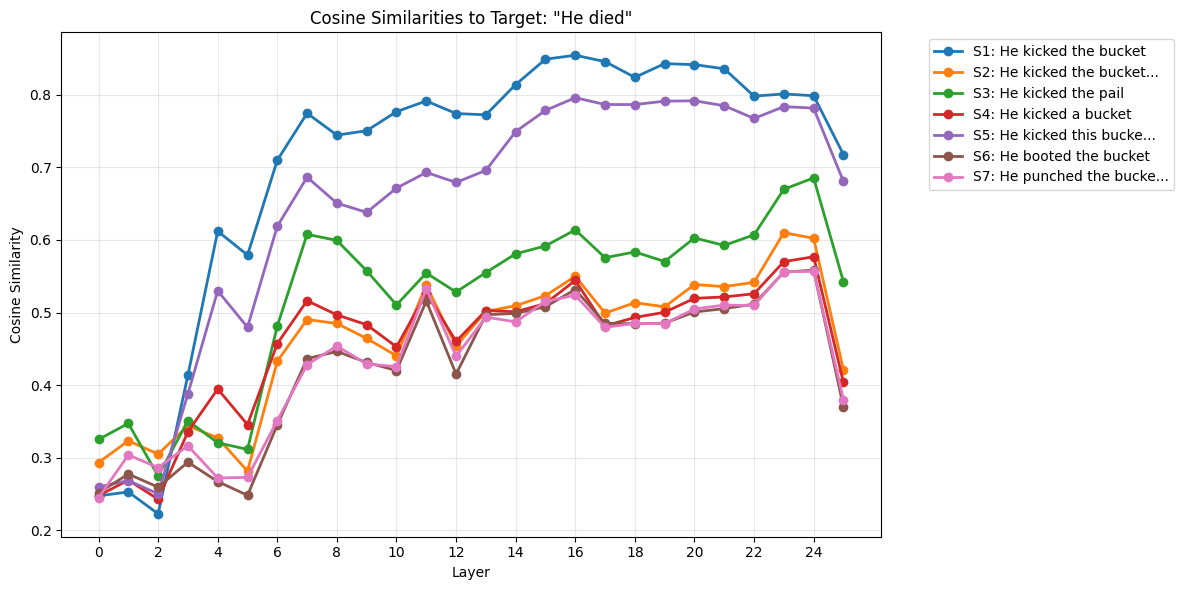


Summary Statistics:
------------------------------------------------------------
Target: 'He died'
Final layer (25) similarities:
  S1: 0.7178 - He kicked the bucket
  S2: 0.4209 - He kicked the buckets
  S3: 0.5425 - He kicked the pail
  S4: 0.4036 - He kicked a bucket
  S5: 0.6807 - He kicked this bucket
  S6: 0.3701 - He booted the bucket
  S7: 0.3800 - He punched the bucket



In [26]:
gemma_utils.plot_target_similarities(model,
                                     sentences=["He kicked the bucket", "He kicked the buckets", "He kicked the pail", "He kicked a bucket", "He kicked this bucket", 
                                                # "He kicked that bucket", "He kicked one bucket",
                                                "He booted the bucket", "He punched the bucket"],
                                     target_sentence="He died")

Threshold Sweep: 100%|██████████| 40/40 [02:49<00:00,  4.24s/it]


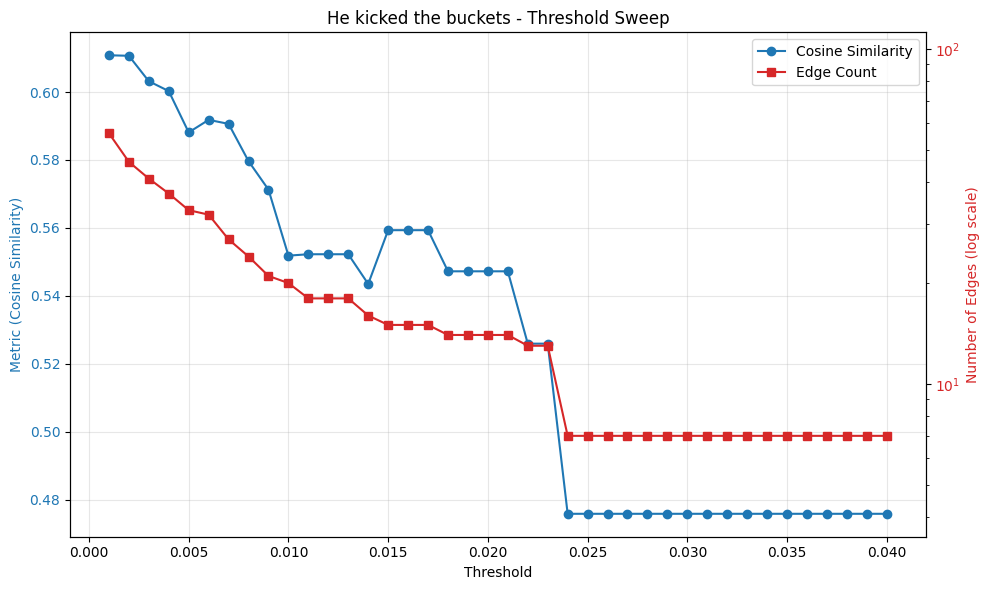

Threshold Sweep: 100%|██████████| 40/40 [02:36<00:00,  3.92s/it]


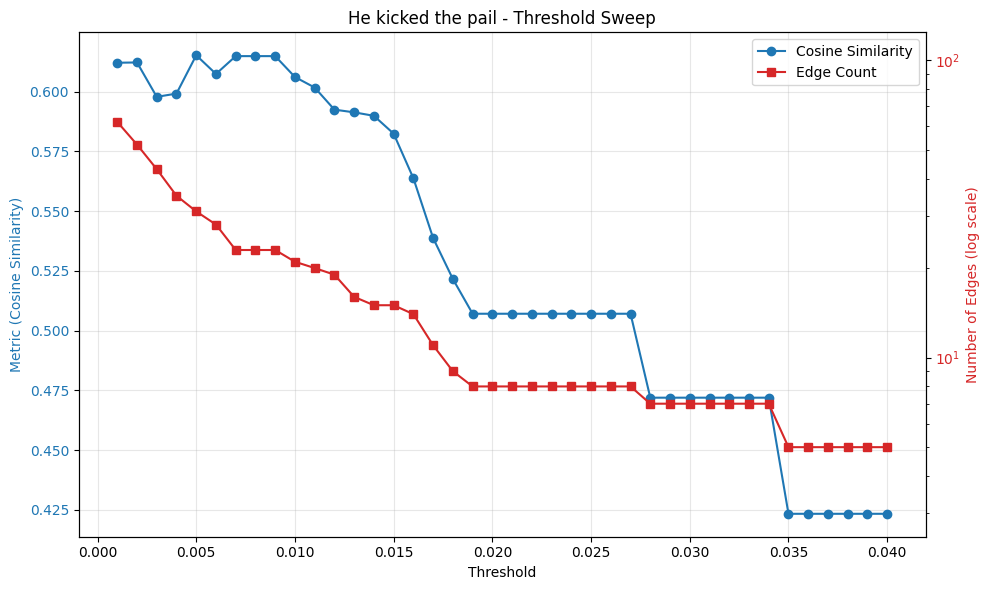

Threshold Sweep: 100%|██████████| 40/40 [03:23<00:00,  5.09s/it]


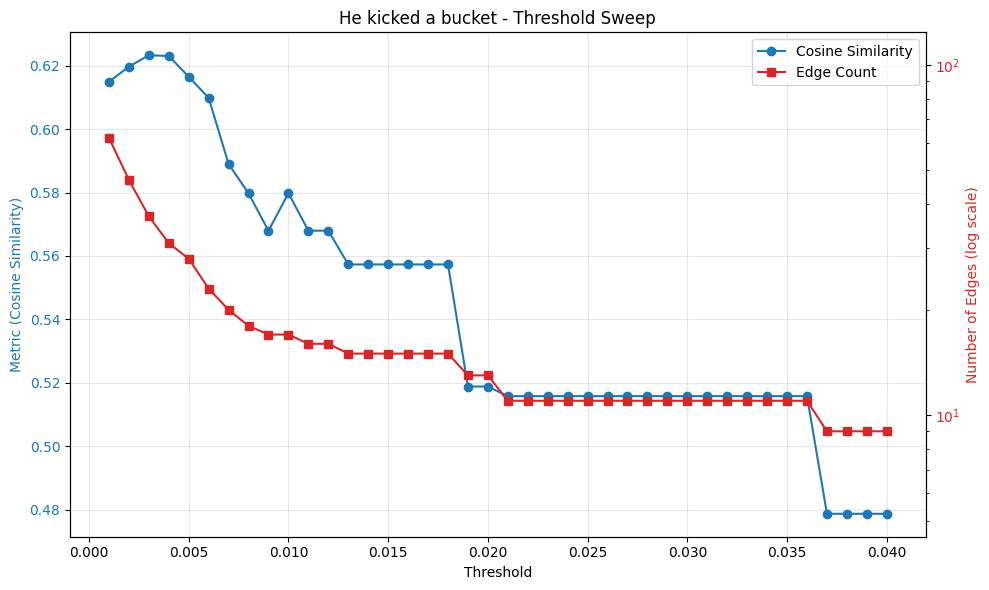

Threshold Sweep: 100%|██████████| 40/40 [02:28<00:00,  3.72s/it]


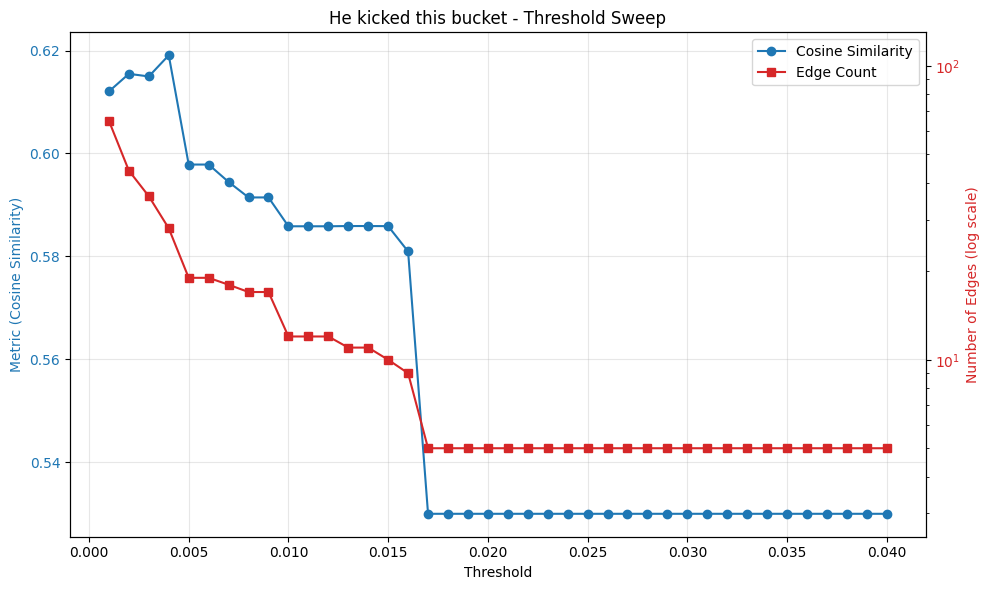

Threshold Sweep: 100%|██████████| 40/40 [04:19<00:00,  6.48s/it]


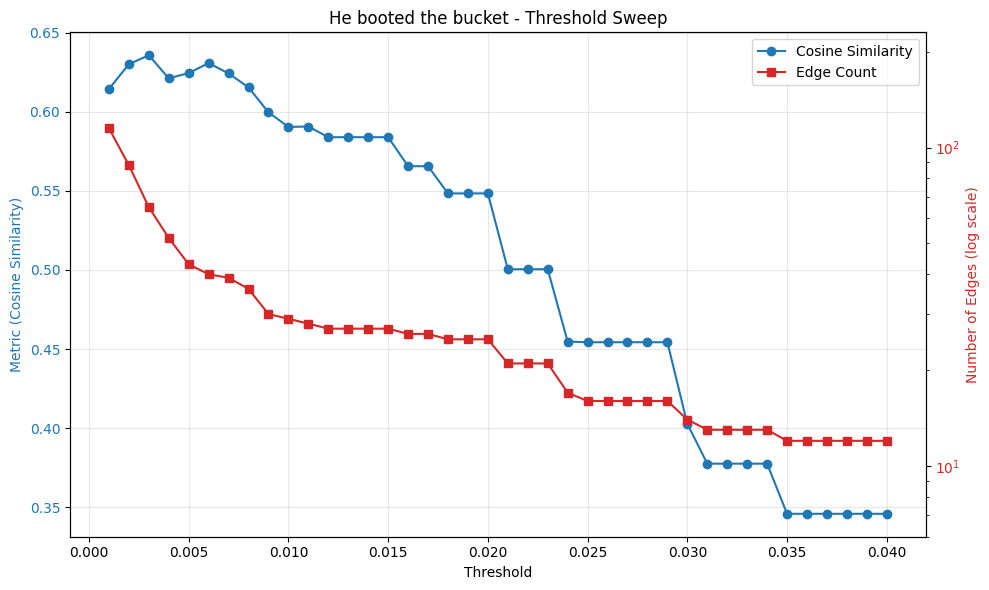

Threshold Sweep: 100%|██████████| 40/40 [04:43<00:00,  7.09s/it]


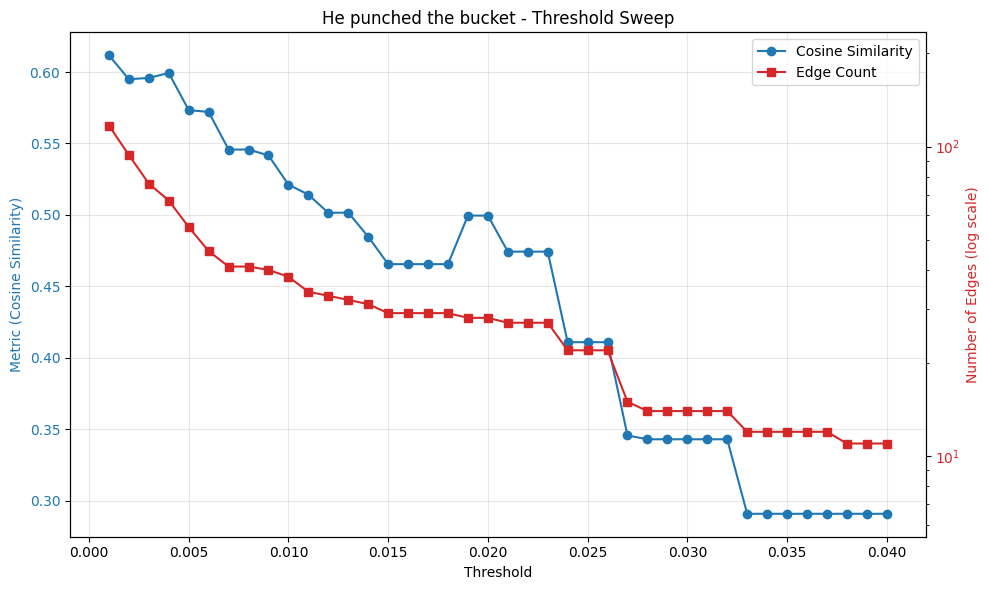

In [8]:
_ = simple_acdc.multi_corrupted_threshold_sweep(model, max_layer=4,
                                      original_text="He kicked the bucket",
                                      corrupted_texts=["He kicked the buckets", "He kicked the pail", "He kicked a bucket", "He kicked this bucket", "He booted the bucket", "He punched the bucket"],
                                      target_text="He died",
                                      min_token_pos=2,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

In [7]:
# _ = simple_acdc.threshold_sweep(model, max_layer=4,
#                  original_text="He kicked the bucket", corrupted_text="He kicked the buckets", target_text="He died", thresholds=(0.001, 0.04, 0.01), min_token_pos=2, corrupt_q=True)


Circuit visualization saved to bucket_buckets_circuit.png


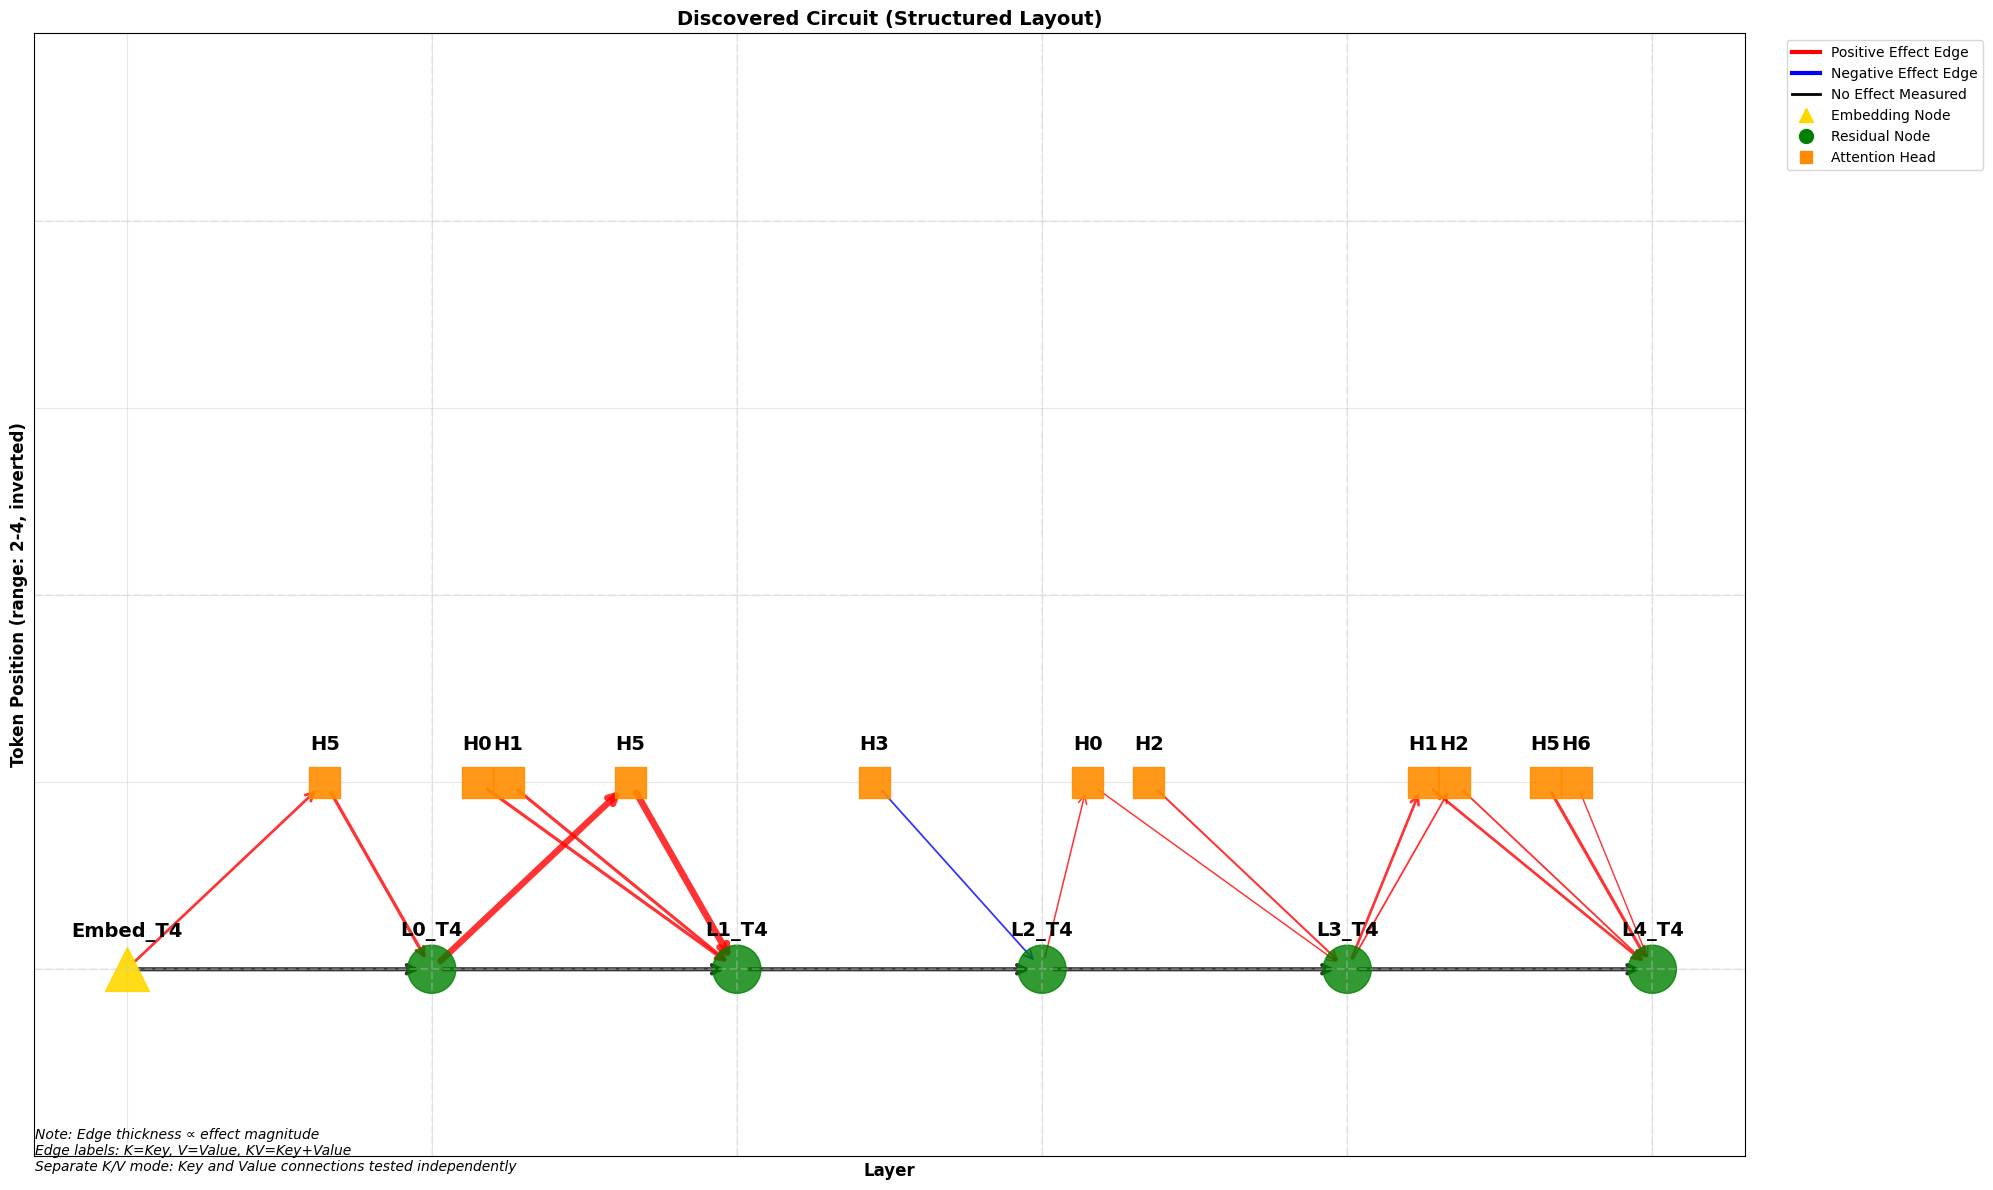


Circuit Summary:
Nodes: 17
Edges: 21

Edges by effect size:
  L1H5_T4 → L1_T4 (attn_out): 0.0840
  L0_T4 → L1H5_T4 (query): 0.0798
  L0H5_T4 → L0_T4 (attn_out): 0.0304
  L1H0_T4 → L1_T4 (attn_out): 0.0295
  L4H5_T4 → L4_T4 (attn_out): 0.0291
  L1H1_T4 → L1_T4 (attn_out): 0.0289
  Embed_T4 → L0H5_T4 (query): 0.0235
  L4H1_T4 → L4_T4 (attn_out): 0.0231
  L3_T4 → L4H1_T4 (query): 0.0228
  L3H2_T4 → L3_T4 (attn_out): 0.0156
  L4H2_T4 → L4_T4 (attn_out): 0.0138
  L3_T4 → L4H2_T4 (query): 0.0132
  L2H3_T4 → L2_T4 (attn_out): -0.0129
  L2_T4 → L3H0_T4 (query): 0.0105
  L3H0_T4 → L3_T4 (attn_out): 0.0098
  L4H6_T4 → L4_T4 (attn_out): 0.0093


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.0, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked the buckets",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_buckets_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_pail_circuit.png


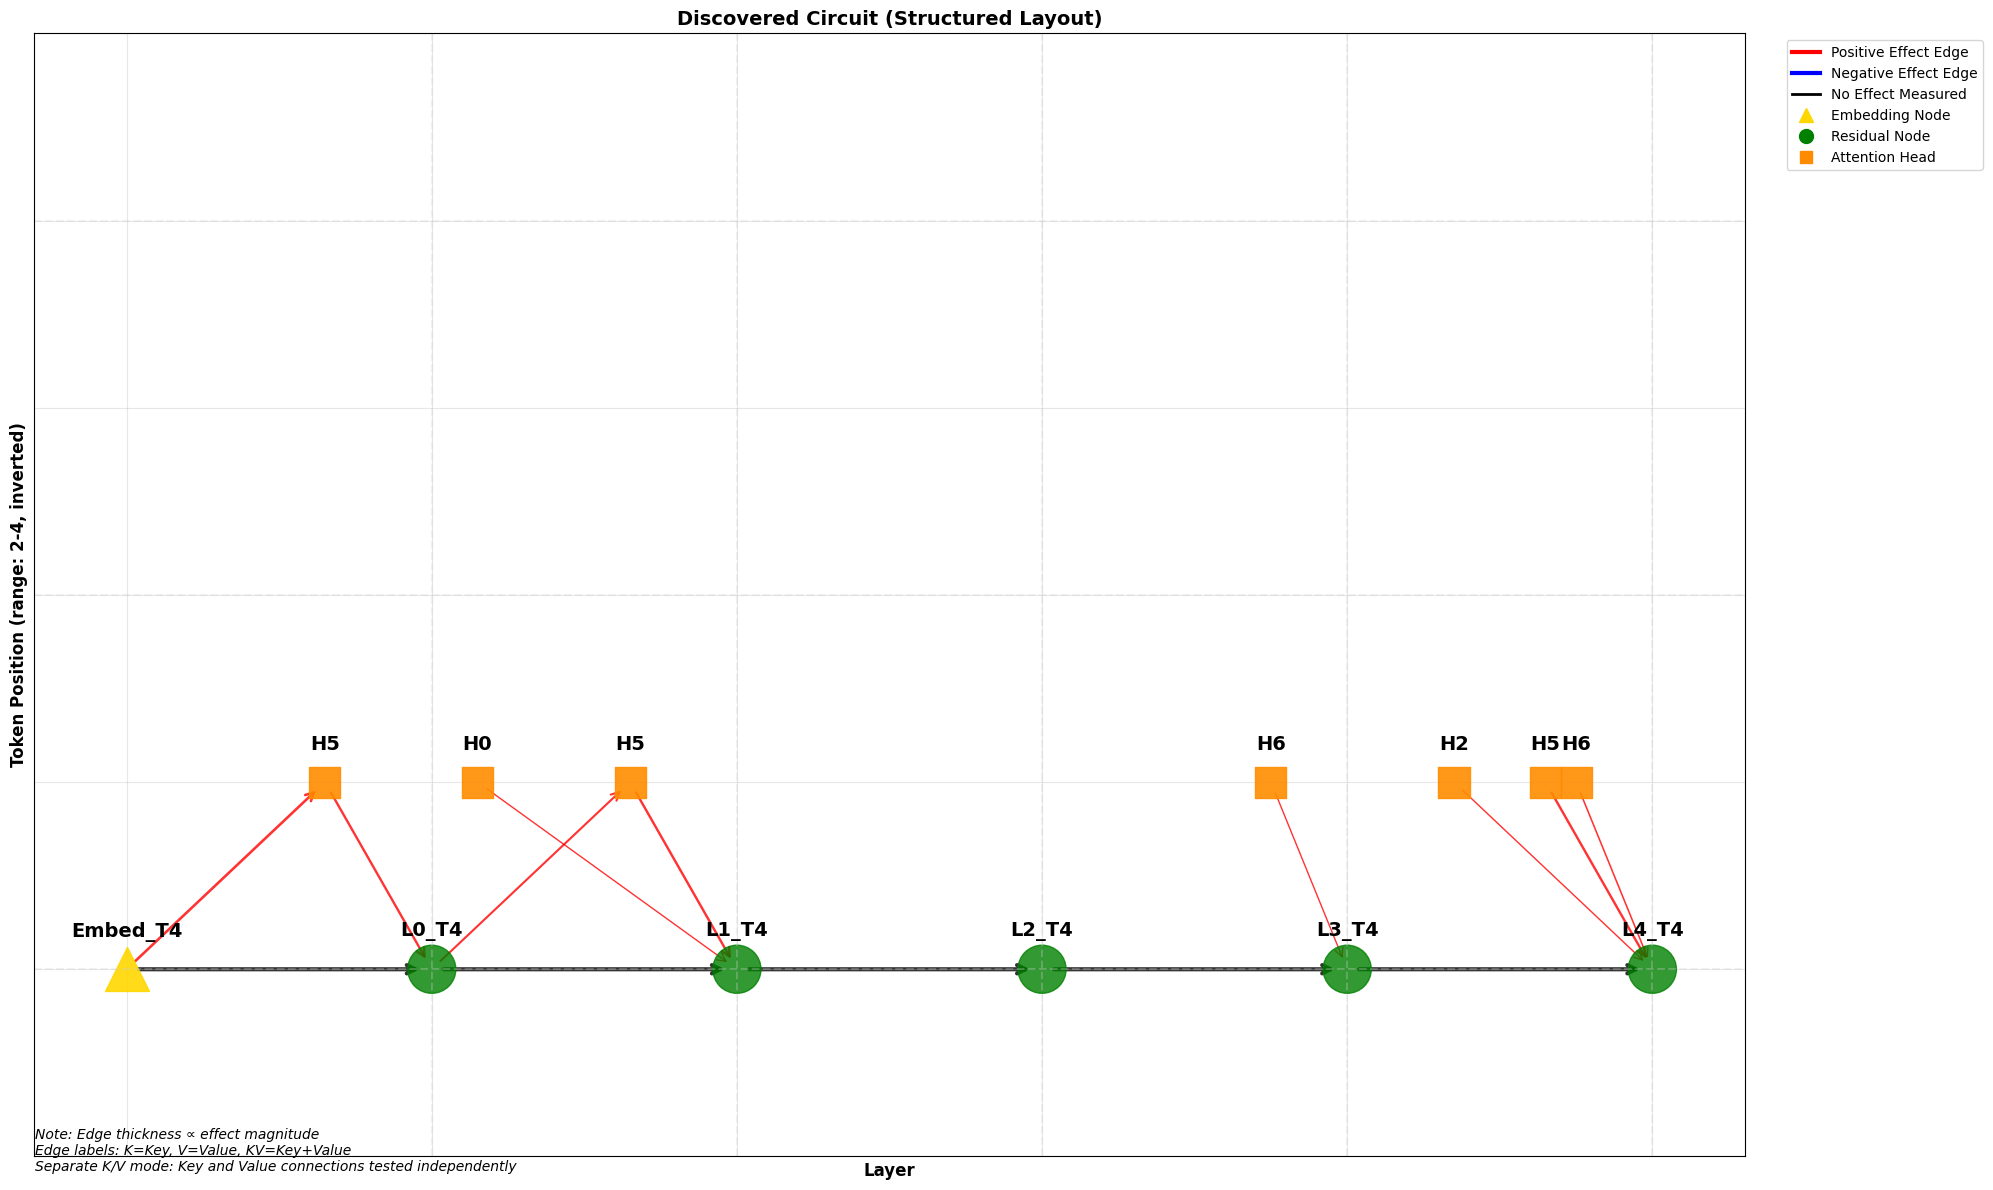


Circuit Summary:
Nodes: 13
Edges: 14

Edges by effect size:
  Embed_T4 → L0H5_T4 (query): 0.0395
  L1H5_T4 → L1_T4 (attn_out): 0.0352
  L4H5_T4 → L4_T4 (attn_out): 0.0347
  L0H5_T4 → L0_T4 (attn_out): 0.0340
  L0_T4 → L1H5_T4 (query): 0.0290
  L4H6_T4 → L4_T4 (attn_out): 0.0193
  L4H2_T4 → L4_T4 (attn_out): 0.0164
  L1H0_T4 → L1_T4 (attn_out): 0.0161
  L3H6_T4 → L3_T4 (attn_out): 0.0160


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.01, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked the pail",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_pail_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_a_circuit.png


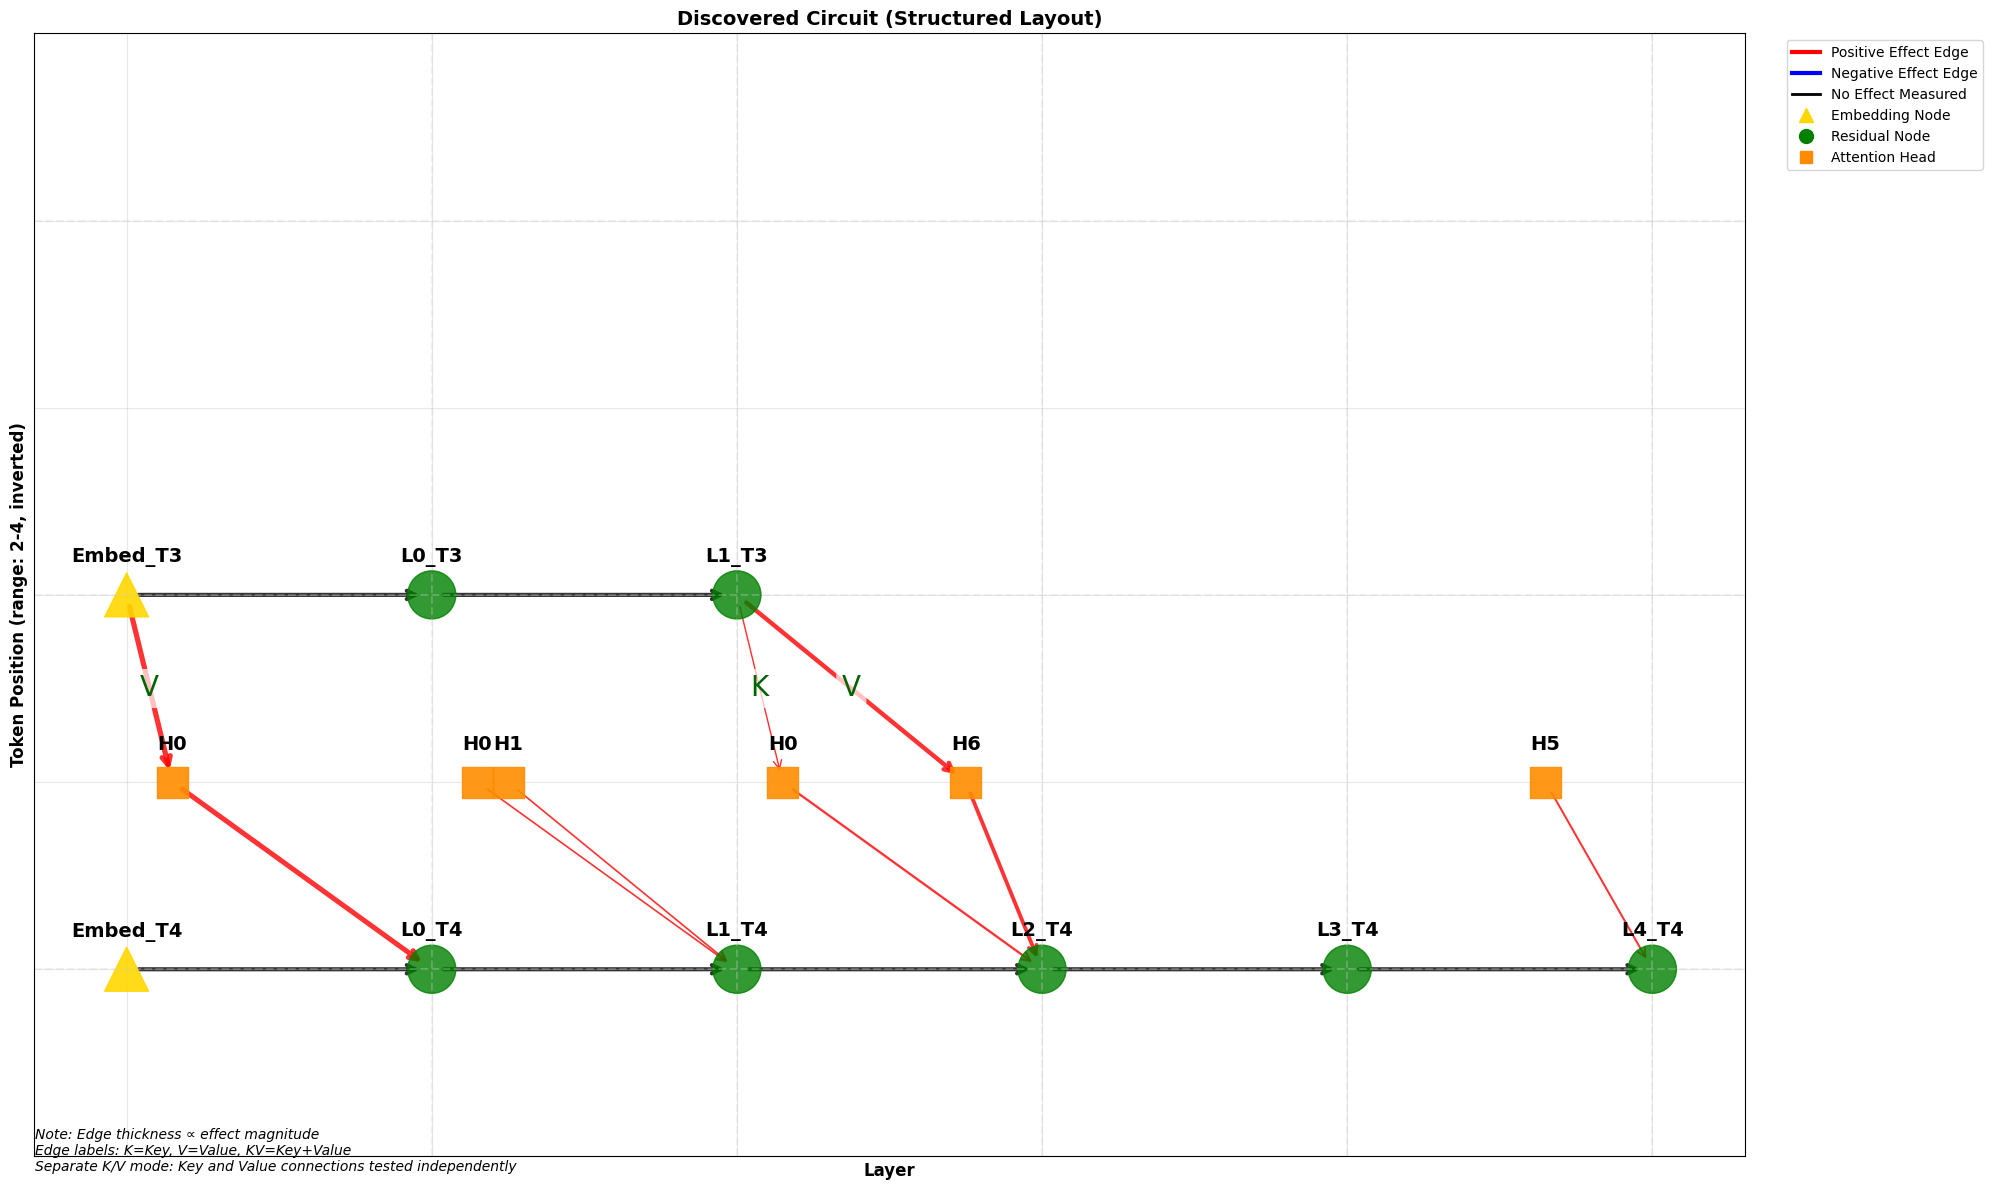


Circuit Summary:
Nodes: 15
Edges: 16

Edges by effect size:
  Embed_T3 → L0H0_T4 (value): 0.0794
  L0H0_T4 → L0_T4 (attn_out): 0.0749
  L1_T3 → L2H6_T4 (value): 0.0625
  L2H6_T4 → L2_T4 (attn_out): 0.0512
  L2H0_T4 → L2_T4 (attn_out): 0.0249
  L4H5_T4 → L4_T4 (attn_out): 0.0204
  L1H1_T4 → L1_T4 (attn_out): 0.0158
  L1H0_T4 → L1_T4 (attn_out): 0.0156
  L1_T3 → L2H0_T4 (key): 0.0127


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.012, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked a bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_a_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_this_circuit.png


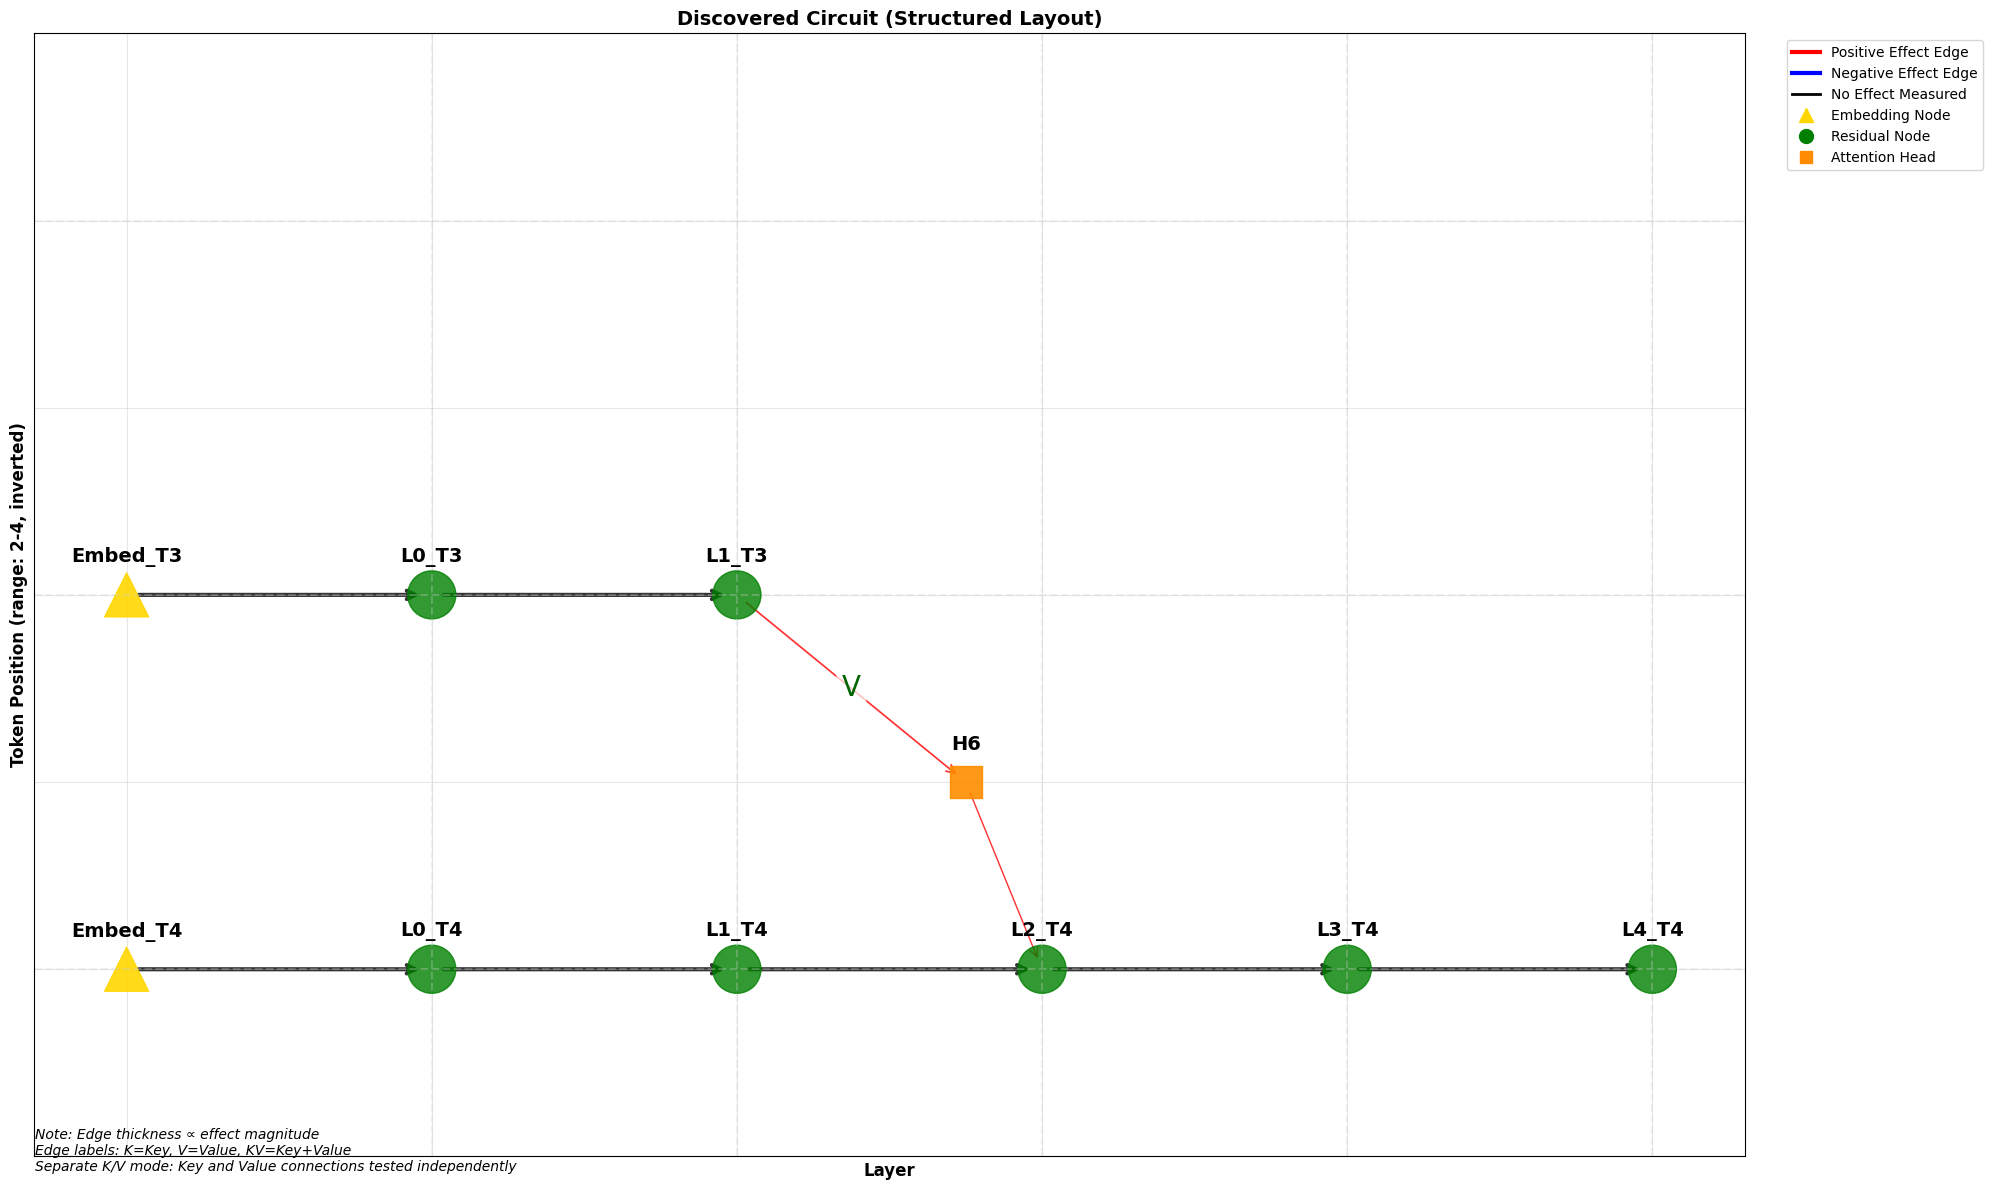


Circuit Summary:
Nodes: 10
Edges: 9

Edges by effect size:
  L1_T3 → L2H6_T4 (value): 0.0220
  L2H6_T4 → L2_T4 (attn_out): 0.0164


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.016, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked this bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_this_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_booted_circuit.png


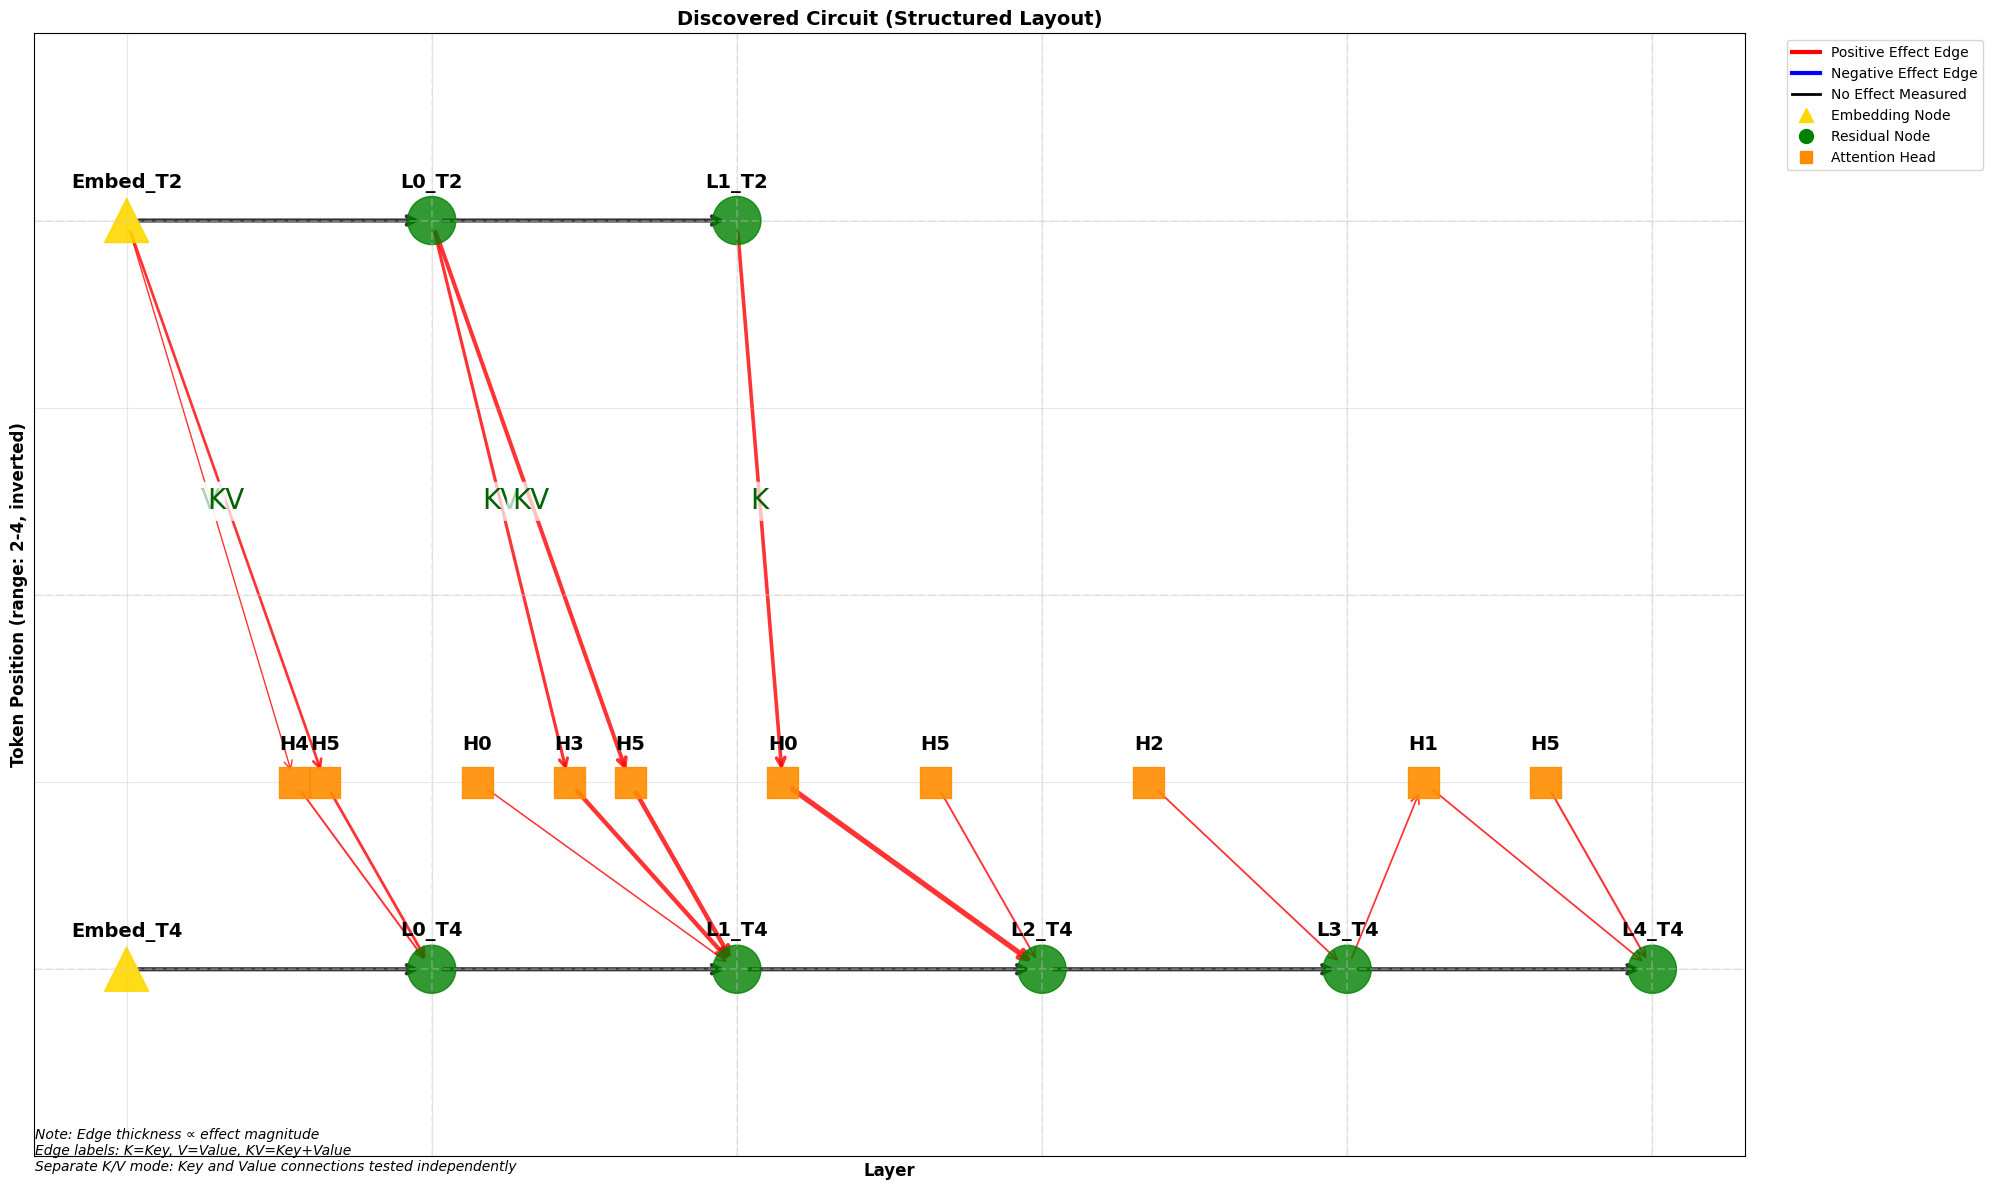


Circuit Summary:
Nodes: 19
Edges: 26

Edges by effect size:
  L2H0_T4 → L2_T4 (attn_out): 0.1161
  L1H5_T4 → L1_T4 (attn_out): 0.0903
  L1H3_T4 → L1_T4 (attn_out): 0.0869
  L0_T2 → L1H5_T4 (key): 0.0771
  L1_T2 → L2H0_T4 (key): 0.0666
  L0_T2 → L1H3_T4 (value): 0.0549
  L0_T2 → L1H3_T4 (key): 0.0503
  L0H5_T4 → L0_T4 (attn_out): 0.0466
  Embed_T2 → L0H5_T4 (value): 0.0440
  Embed_T2 → L0H5_T4 (key): 0.0321
  L4H5_T4 → L4_T4 (attn_out): 0.0305
  L0H4_T4 → L0_T4 (attn_out): 0.0278
  L0_T2 → L1H5_T4 (value): 0.0267
  L2H5_T4 → L2_T4 (attn_out): 0.0266
  L3H2_T4 → L3_T4 (attn_out): 0.0249
  L4H1_T4 → L4_T4 (attn_out): 0.0243
  L3_T4 → L4H1_T4 (query): 0.0234
  L1H0_T4 → L1_T4 (attn_out): 0.0201
  Embed_T2 → L0H4_T4 (value): 0.0172


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.017, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He booted the bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_booted_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_punched_circuit.png


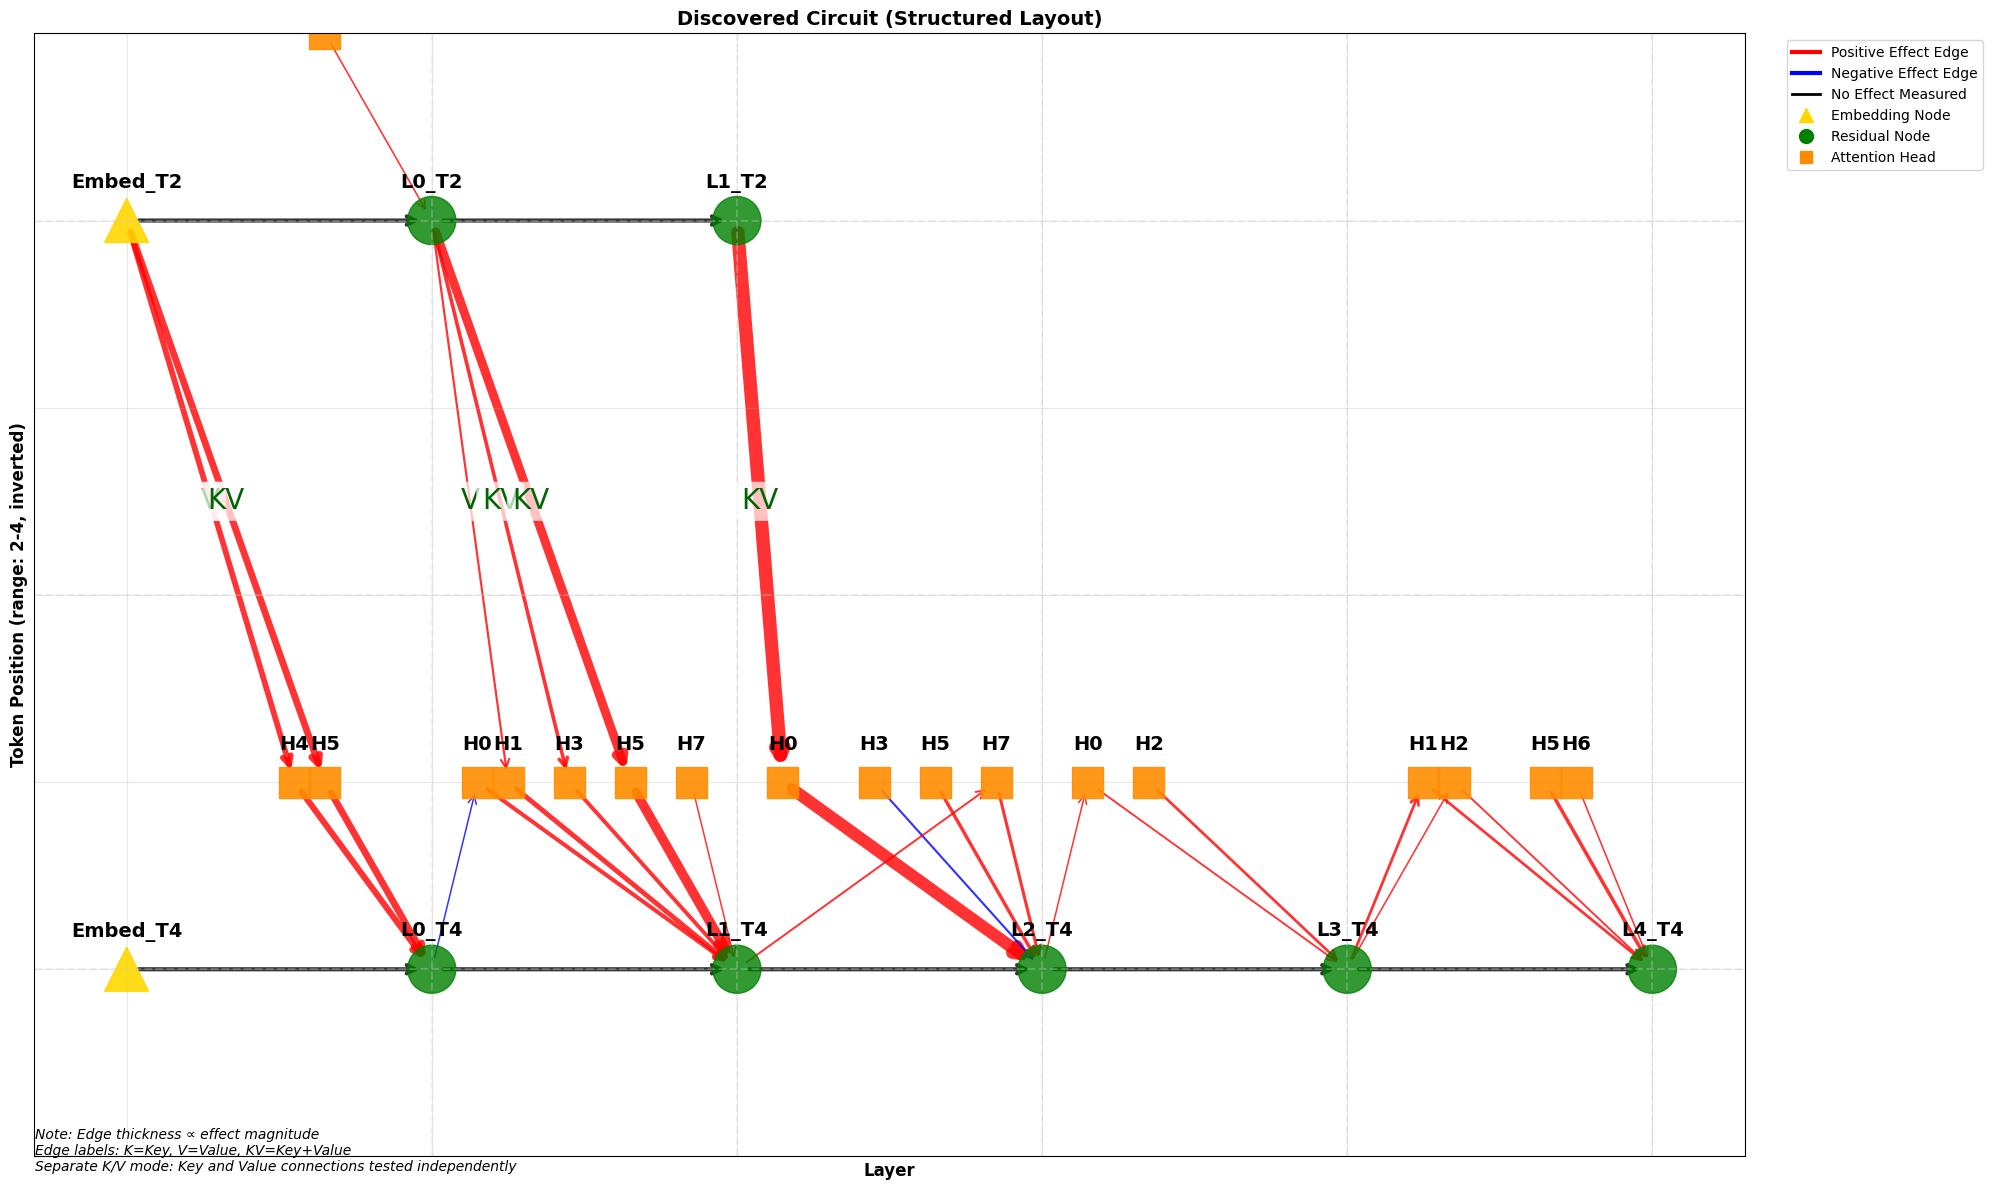


Circuit Summary:
Nodes: 27
Edges: 40

Edges by effect size:
  L1_T2 → L2H0_T4 (key): 0.2291
  L2H0_T4 → L2_T4 (attn_out): 0.1991
  L1H5_T4 → L1_T4 (attn_out): 0.1422
  L0_T2 → L1H5_T4 (key): 0.1261
  L0H5_T4 → L0_T4 (attn_out): 0.0872
  Embed_T2 → L0H5_T4 (value): 0.0865
  L0H4_T4 → L0_T4 (attn_out): 0.0750
  Embed_T2 → L0H4_T4 (value): 0.0677
  L1H1_T4 → L1_T4 (attn_out): 0.0539
  Embed_T2 → L0H5_T4 (key): 0.0530
  L1H0_T4 → L1_T4 (attn_out): 0.0411
  L1H3_T4 → L1_T4 (attn_out): 0.0393
  L0_T2 → L1H3_T4 (key): 0.0353
  L4H5_T4 → L4_T4 (attn_out): 0.0341
  L2H5_T4 → L2_T4 (attn_out): 0.0320
  L1_T2 → L2H0_T4 (value): 0.0293
  L2H7_T4 → L2_T4 (attn_out): 0.0280
  L3_T4 → L4H1_T4 (query): 0.0242
  L4H1_T4 → L4_T4 (attn_out): 0.0236
  L3H2_T4 → L3_T4 (attn_out): 0.0235
  L0_T2 → L1H5_T4 (value): 0.0232
  L0_T2 → L1H1_T4 (value): 0.0171
  L2H3_T4 → L2_T4 (attn_out): -0.0165
  L1_T4 → L2H7_T4 (query): 0.0148
  L4H2_T4 → L4_T4 (attn_out): 0.0143
  L3H0_T4 → L3_T4 (attn_out): 0.0139
  L0H5_T

In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.009, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He punched the bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_punched_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to merged_circuit.png


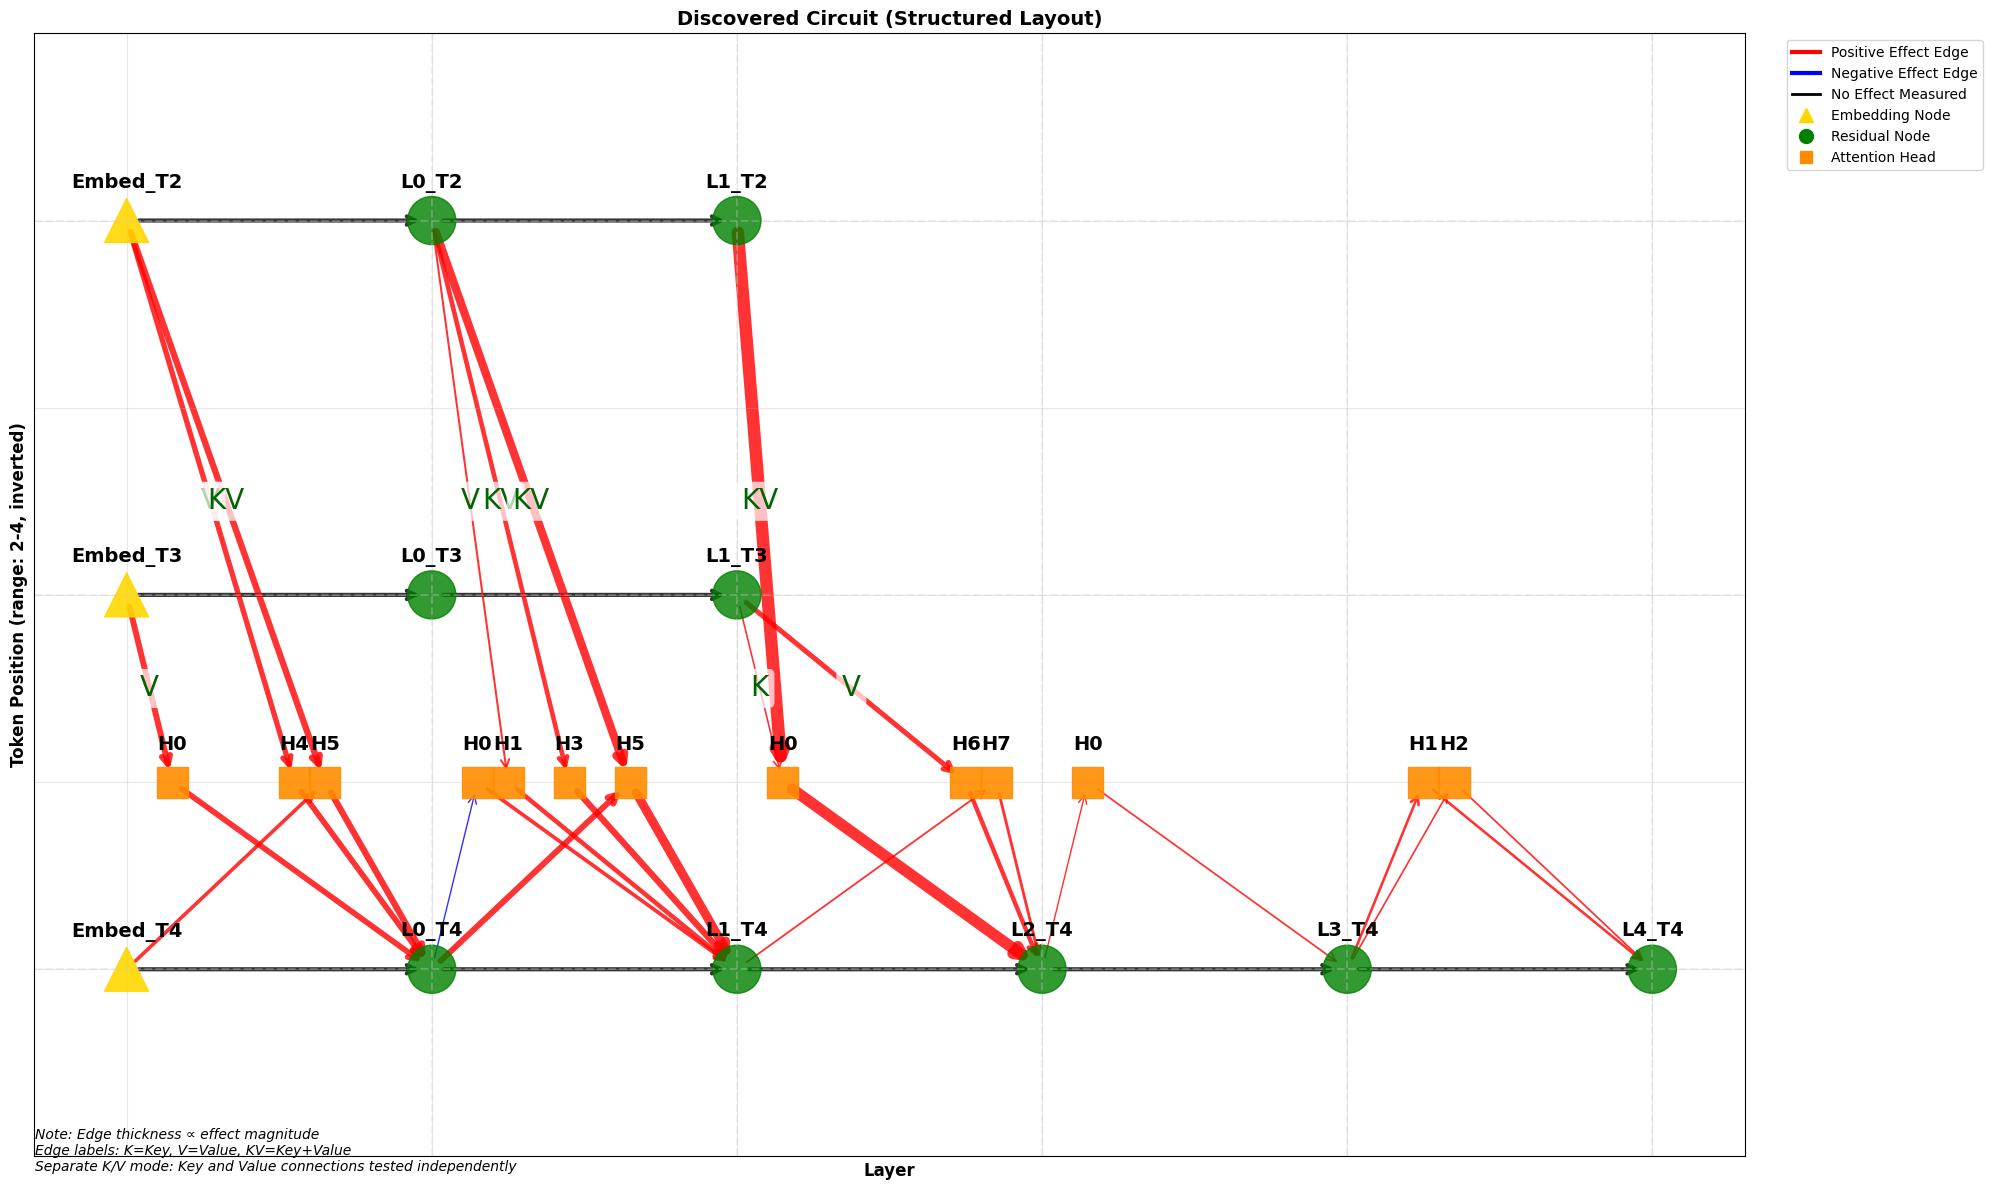


Circuit Summary:
Nodes: 25
Edges: 42

Edges by effect size:
  L1_T2 → L2H0_T4 (key): 0.2291
  L2H0_T4 → L2_T4 (attn_out): 0.1991
  L1H5_T4 → L1_T4 (attn_out): 0.1422
  L0_T2 → L1H5_T4 (key): 0.1261
  L0H5_T4 → L0_T4 (attn_out): 0.0872
  L1H3_T4 → L1_T4 (attn_out): 0.0869
  Embed_T2 → L0H5_T4 (value): 0.0865
  L0_T4 → L1H5_T4 (query): 0.0798
  Embed_T3 → L0H0_T4 (value): 0.0794
  L0H4_T4 → L0_T4 (attn_out): 0.0750
  L0H0_T4 → L0_T4 (attn_out): 0.0749
  Embed_T2 → L0H4_T4 (value): 0.0677
  L1_T3 → L2H6_T4 (value): 0.0625
  L0_T2 → L1H3_T4 (value): 0.0549
  L1H1_T4 → L1_T4 (attn_out): 0.0539
  Embed_T2 → L0H5_T4 (key): 0.0530
  L2H6_T4 → L2_T4 (attn_out): 0.0512
  L0_T2 → L1H3_T4 (key): 0.0503
  L1H0_T4 → L1_T4 (attn_out): 0.0411
  Embed_T4 → L0H5_T4 (query): 0.0395
  L1_T2 → L2H0_T4 (value): 0.0293
  L2H7_T4 → L2_T4 (attn_out): 0.0280
  L0_T2 → L1H5_T4 (value): 0.0267
  L4H1_T4 → L4_T4 (attn_out): 0.0243
  L3_T4 → L4H1_T4 (query): 0.0242
  L0_T2 → L1H1_T4 (value): 0.0171
  L1_T4 → L2H7_

In [ ]:
# Test the new build_and_merge_circuits function
importlib.reload(simple_acdc)

# Build and merge circuits with individual thresholds for each corrupted text
merged_circuit, individual_circuits, metrics = simple_acdc.build_and_merge_circuits(
    model=model,
    max_layer=4,
    original_text="He kicked the bucket",
    corrupted_texts=["He kicked the buckets", "He kicked the pail", "He kicked a bucket", "He kicked this bucket", "He booted the bucket", "He punched the bucket"],
    target_text="He died",
    # thresholds=[0.013, 0.015, 0.018, 0.004, 0.008, 0.01],  # Individual thresholds for each
    thresholds=[0.009, 0.016, 0.012, 0.016, 0.017, 0.009],  # Individual thresholds for each
    min_token_pos=2,
    corrupt_q=True,
    separate_kv=True,
    quiet=True
)

# Visualize the merged circuit
# Create a SimpleACDC instance to use its visualization method
acdc_visualizer = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.01, corrupt_q=True, separate_kv=True)
acdc_visualizer.visualize_circuit(merged_circuit, 
                                #  save_path="circuits/merged_circuit.png",
                                 min_token_pos=2)

Analyzing similarities to target sentence: 'He died'
Comparing 5 sentences across layers...


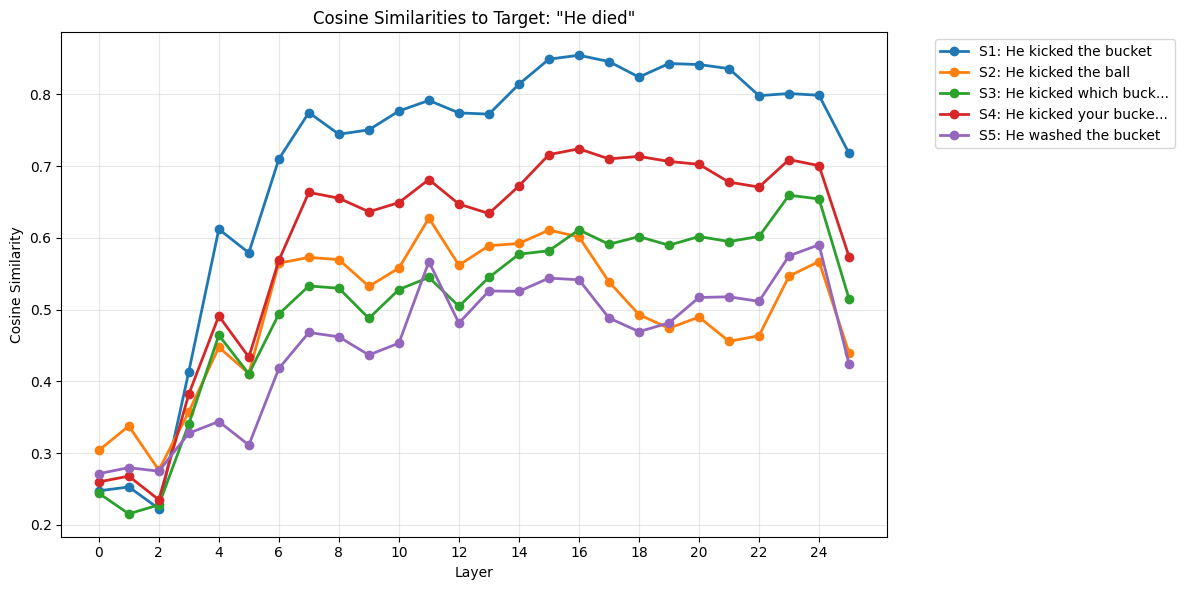


Summary Statistics:
------------------------------------------------------------
Target: 'He died'
Final layer (25) similarities:
  S1: 0.7178 - He kicked the bucket
  S2: 0.4396 - He kicked the ball
  S3: 0.5150 - He kicked which bucket
  S4: 0.5738 - He kicked your bucket
  S5: 0.4241 - He washed the bucket



In [37]:
gemma_utils.plot_target_similarities(model,
                                     sentences=["He kicked the bucket", "He kicked the ball", "He kicked which bucket", "He kicked your bucket", "He washed the bucket"],
                                     target_sentence="He died")

Threshold Sweep: 100%|██████████| 40/40 [03:33<00:00,  5.34s/it]


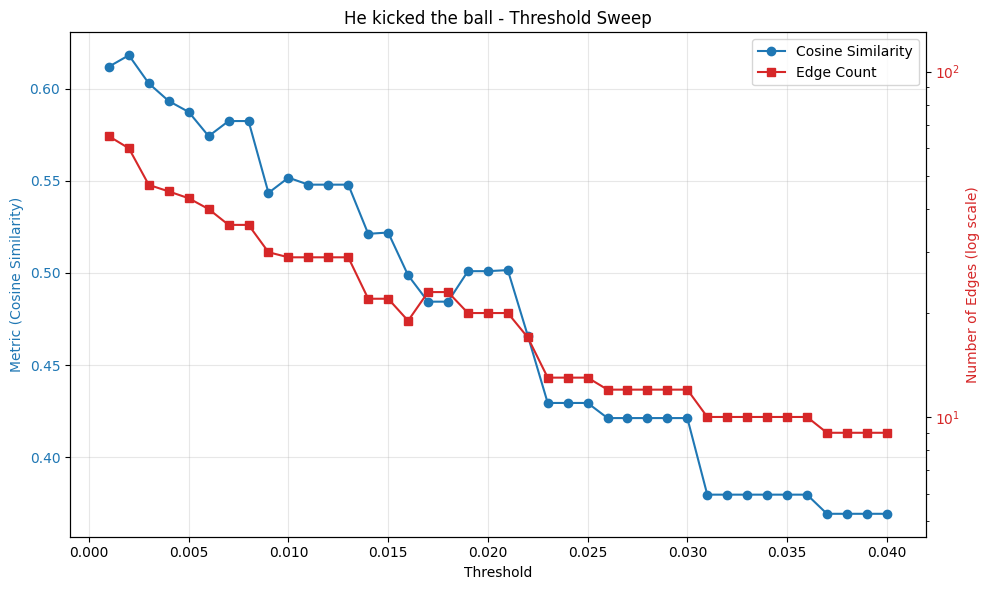

Threshold Sweep: 100%|██████████| 40/40 [03:13<00:00,  4.85s/it]


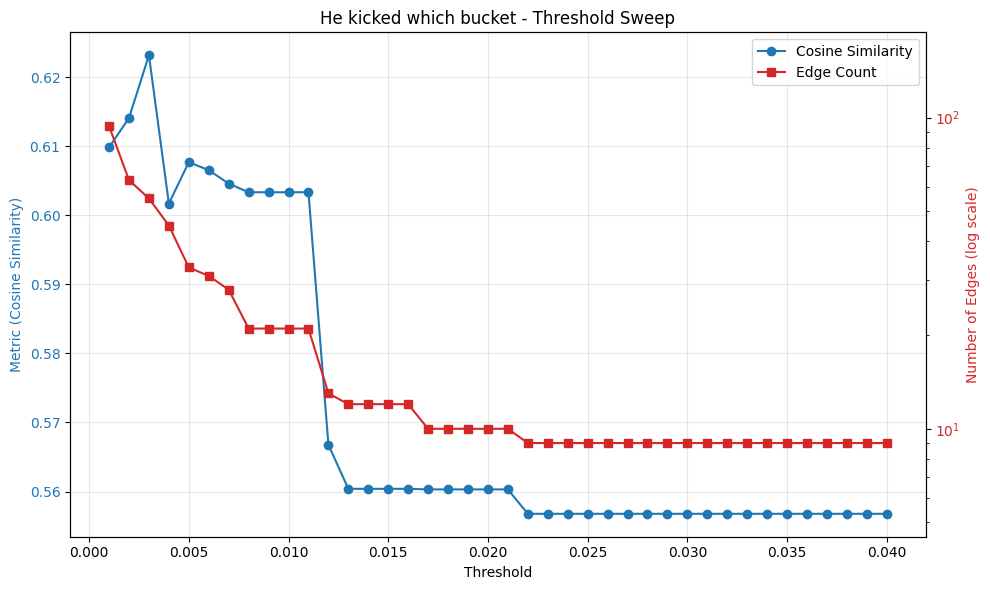

Threshold Sweep: 100%|██████████| 40/40 [04:43<00:00,  7.08s/it]


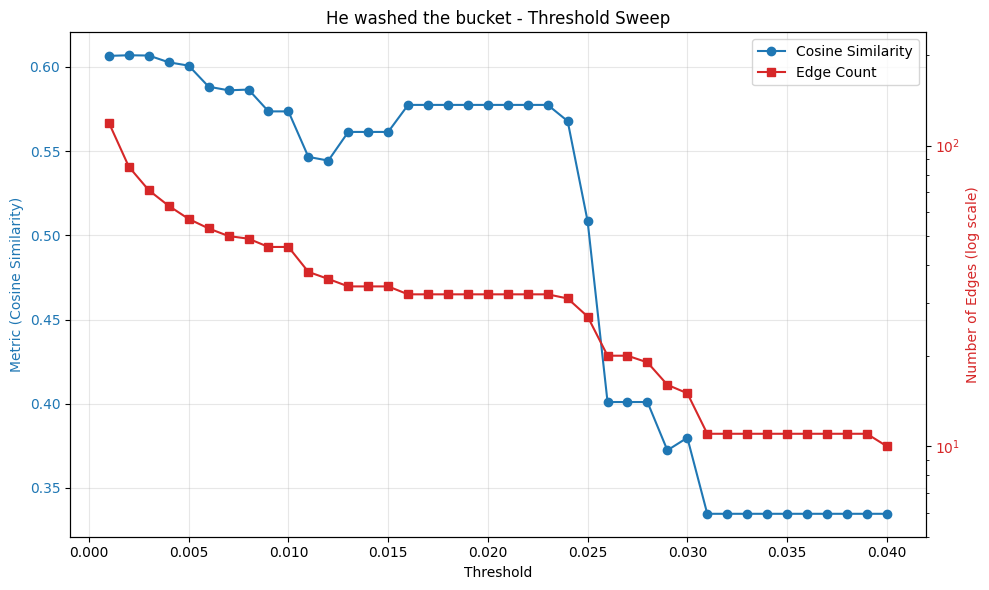

In [29]:
_ = simple_acdc.multi_corrupted_threshold_sweep(model, max_layer=4,
                                      original_text="He kicked the bucket",
                                      corrupted_texts=["He kicked the ball", "He kicked which bucket", "He washed the bucket"],
                                      target_text="He died",
                                      min_token_pos=2,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

Circuit visualization saved to bucket_buckets_circuit.png


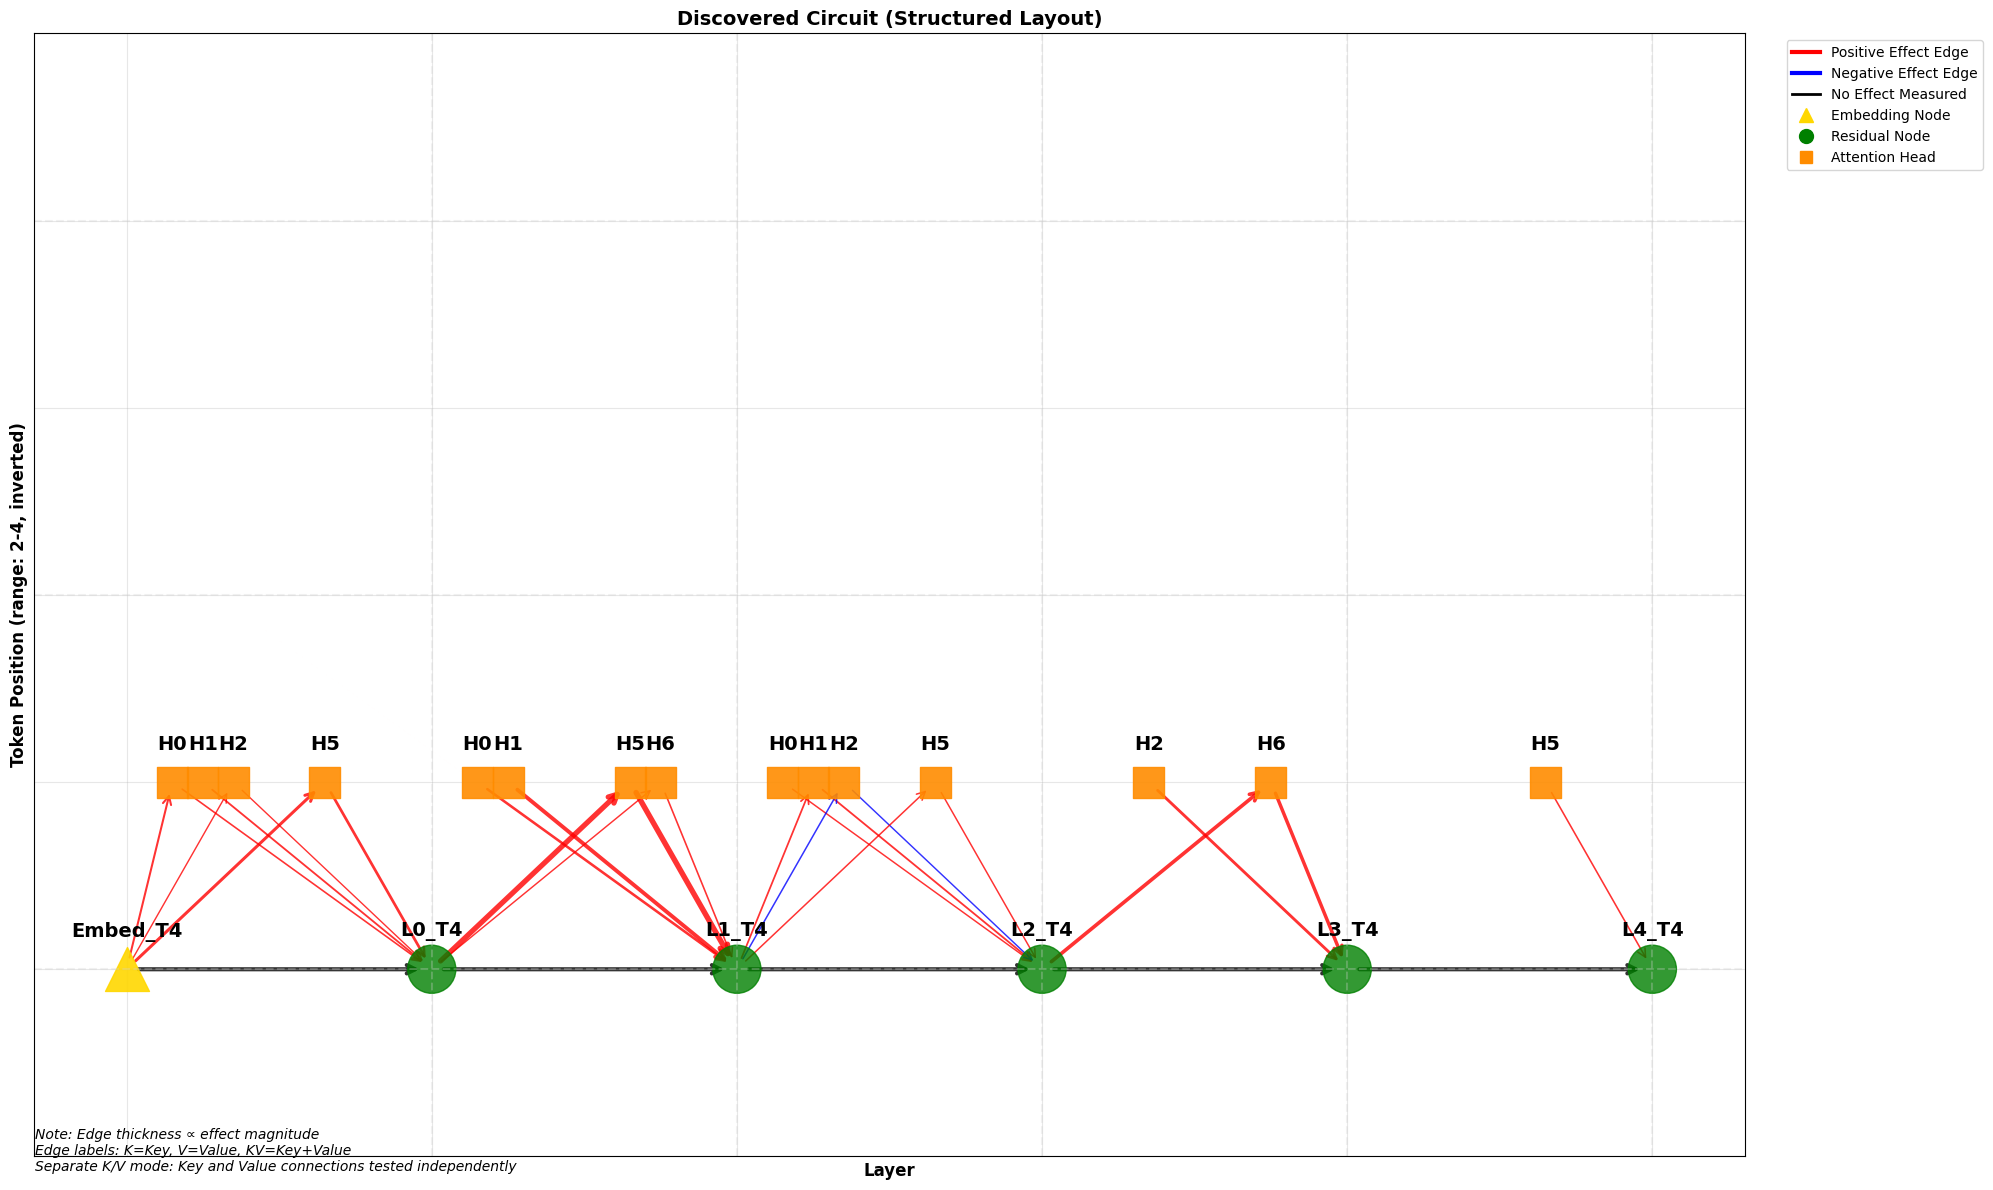


Circuit Summary:
Nodes: 21
Edges: 29

Edges by effect size:
  L1H5_T4 → L1_T4 (attn_out): 0.0909
  L0_T4 → L1H5_T4 (query): 0.0865
  L1H1_T4 → L1_T4 (attn_out): 0.0568
  L2_T4 → L3H6_T4 (query): 0.0519
  L3H6_T4 → L3_T4 (attn_out): 0.0481
  Embed_T4 → L0H5_T4 (query): 0.0396
  L3H2_T4 → L3_T4 (attn_out): 0.0367
  L0H5_T4 → L0_T4 (attn_out): 0.0340
  L1H0_T4 → L1_T4 (attn_out): 0.0315
  Embed_T4 → L0H0_T4 (query): 0.0226
  L0H1_T4 → L0_T4 (attn_out): 0.0194
  L2H1_T4 → L2_T4 (attn_out): 0.0191
  L1_T4 → L2H1_T4 (query): 0.0182
  L0H0_T4 → L0_T4 (attn_out): 0.0165
  L1H6_T4 → L1_T4 (attn_out): 0.0164
  L4H5_T4 → L4_T4 (attn_out): 0.0160
  L1_T4 → L2H2_T4 (query): -0.0149
  L1_T4 → L2H5_T4 (query): 0.0148
  L2H5_T4 → L2_T4 (attn_out): 0.0145
  L2H0_T4 → L2_T4 (attn_out): 0.0143
  L0_T4 → L1H6_T4 (query): 0.0139
  L2H2_T4 → L2_T4 (attn_out): -0.0138
  Embed_T4 → L0H2_T4 (query): 0.0135
  L0H2_T4 → L0_T4 (attn_out): 0.0131


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.013, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked the ball",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_buckets_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_a_circuit.png


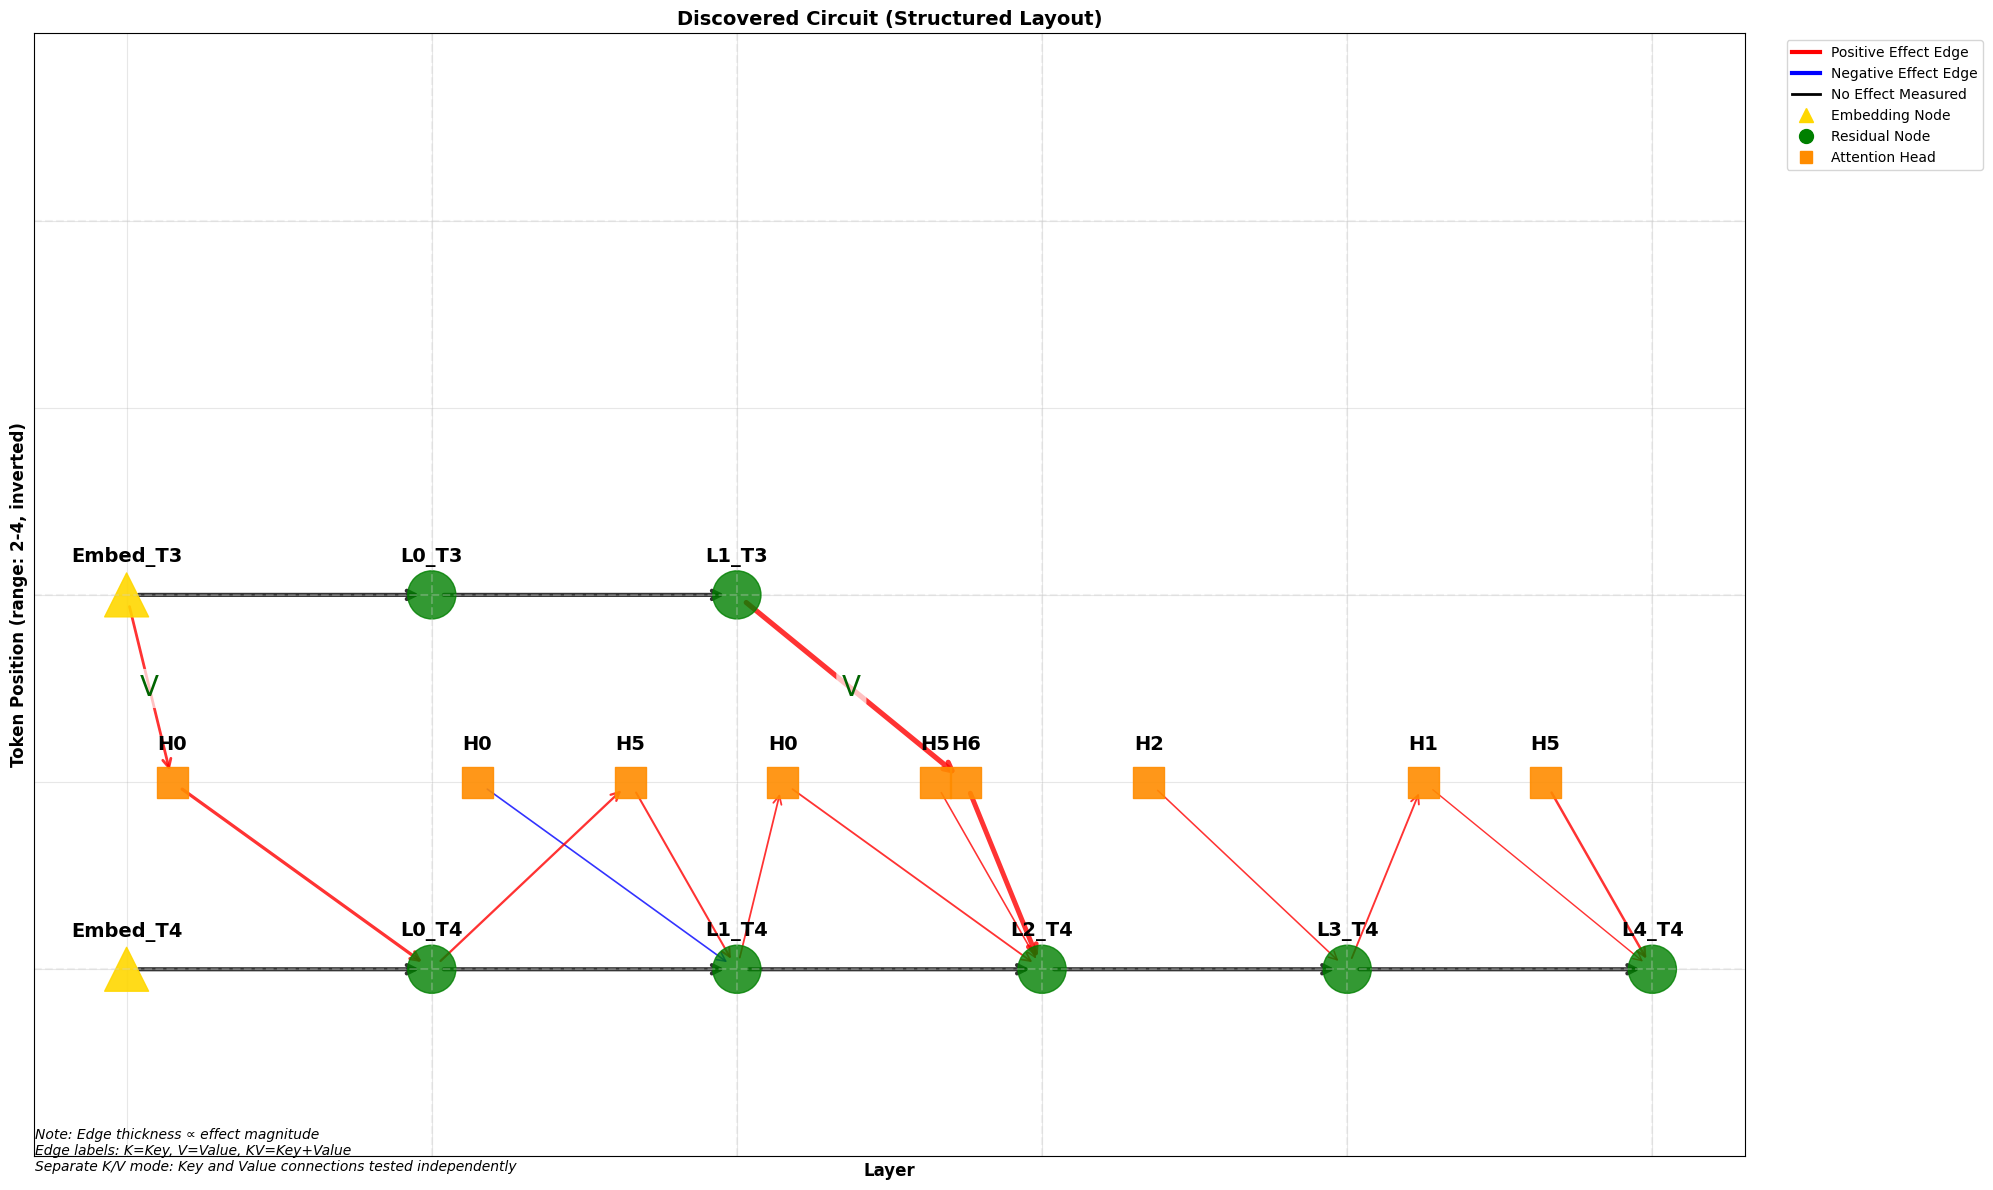


Circuit Summary:
Nodes: 18
Edges: 21

Edges by effect size:
  L1_T3 → L2H6_T4 (value): 0.0724
  L2H6_T4 → L2_T4 (attn_out): 0.0670
  L0H0_T4 → L0_T4 (attn_out): 0.0368
  Embed_T3 → L0H0_T4 (value): 0.0295
  L4H5_T4 → L4_T4 (attn_out): 0.0254
  L0_T4 → L1H5_T4 (query): 0.0226
  L1H5_T4 → L1_T4 (attn_out): 0.0194
  L3_T4 → L4H1_T4 (query): 0.0172
  L2H0_T4 → L2_T4 (attn_out): 0.0163
  L1_T4 → L2H0_T4 (query): 0.0157
  L1H0_T4 → L1_T4 (attn_out): -0.0142
  L2H5_T4 → L2_T4 (attn_out): 0.0135
  L3H2_T4 → L3_T4 (attn_out): 0.0132
  L4H1_T4 → L4_T4 (attn_out): 0.0114


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.011, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked which bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_a_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_booted_circuit.png


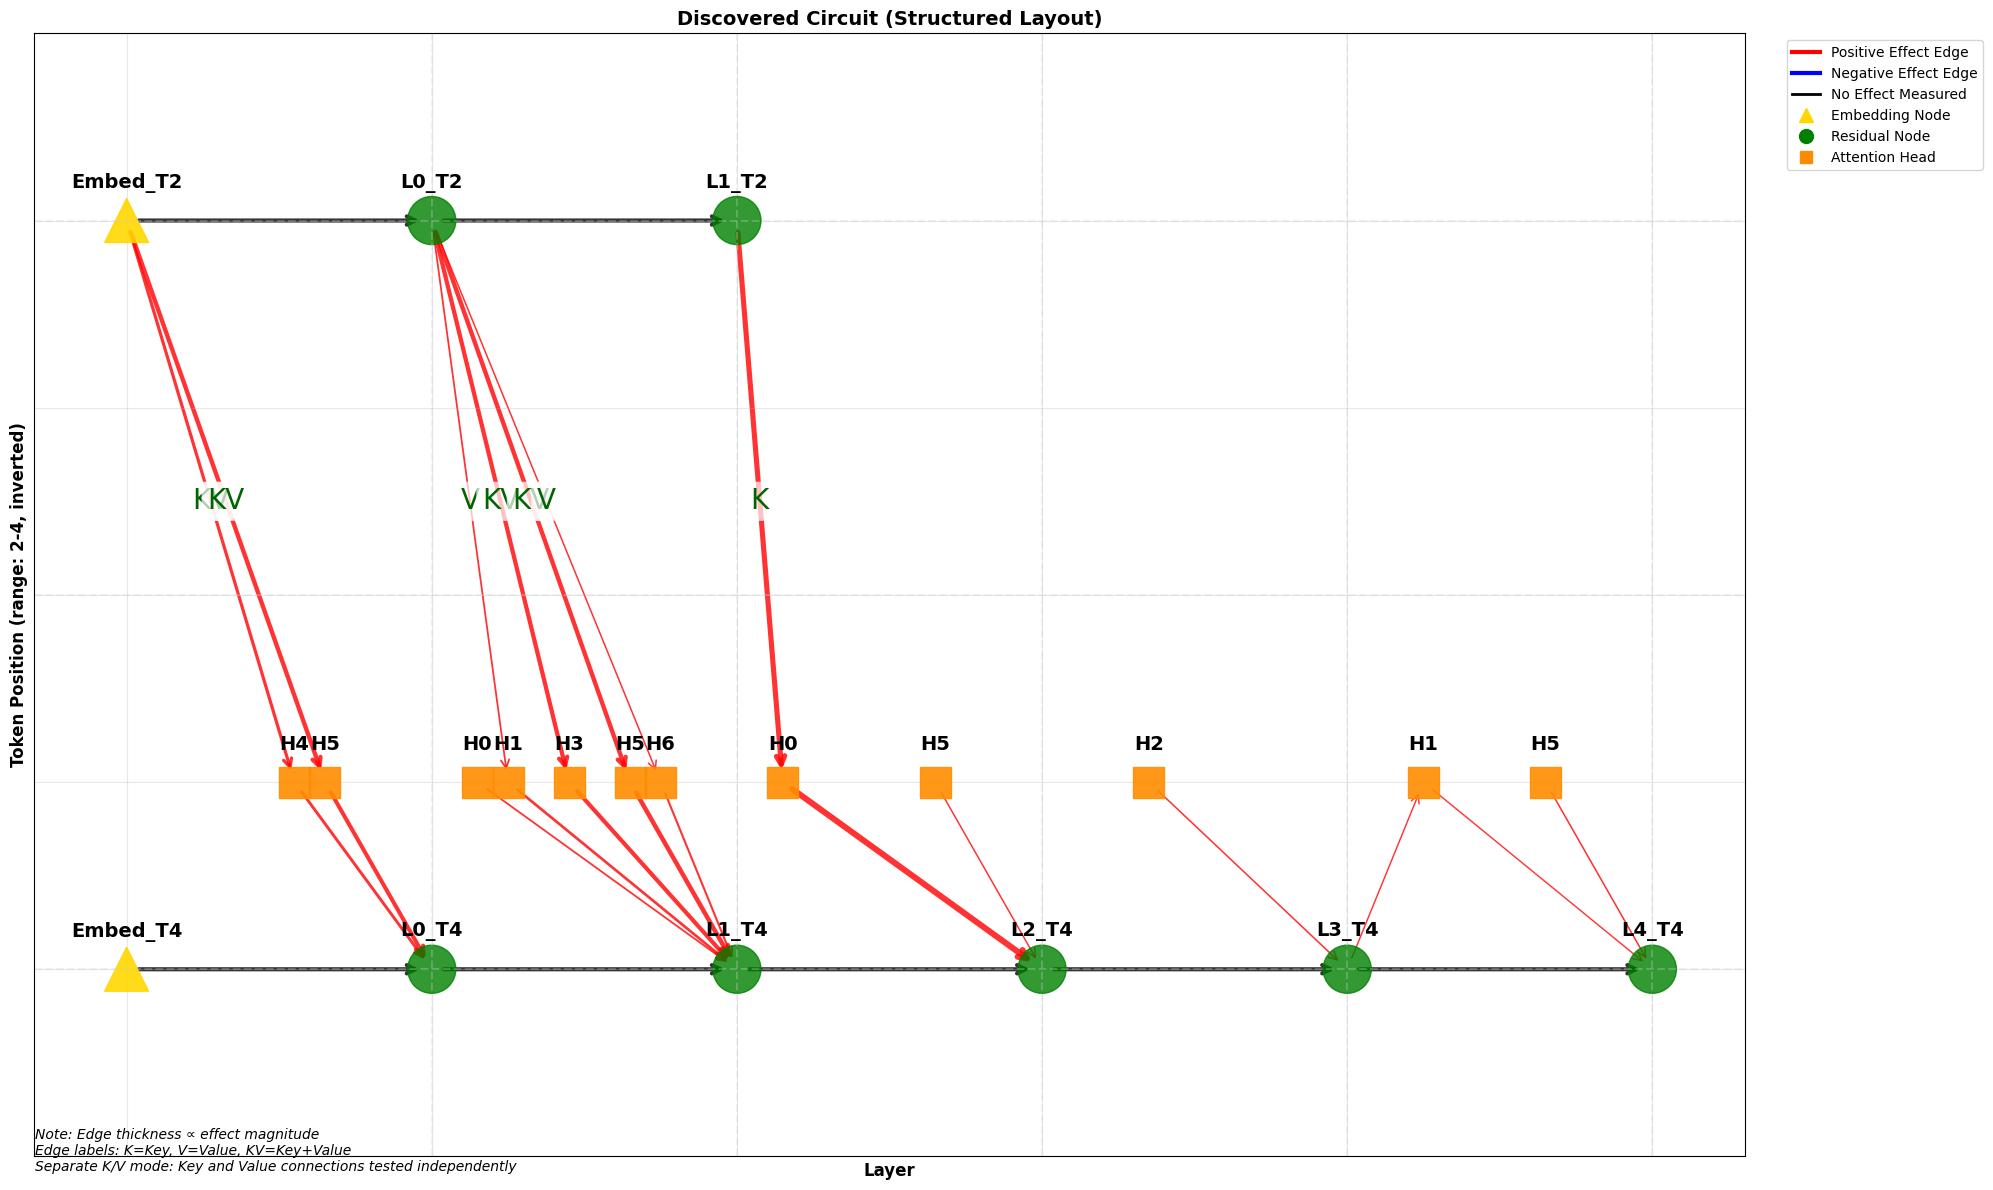


Circuit Summary:
Nodes: 21
Edges: 31

Edges by effect size:
  L2H0_T4 → L2_T4 (attn_out): 0.1952
  L1_T2 → L2H0_T4 (key): 0.1552
  L1H5_T4 → L1_T4 (attn_out): 0.1284
  L0_T2 → L1H5_T4 (key): 0.1233
  Embed_T2 → L0H5_T4 (value): 0.1231
  L0_T2 → L1H3_T4 (value): 0.1187
  L1H3_T4 → L1_T4 (attn_out): 0.1147
  L0H5_T4 → L0_T4 (attn_out): 0.1108
  Embed_T2 → L0H4_T4 (value): 0.0793
  L0H4_T4 → L0_T4 (attn_out): 0.0700
  L1H1_T4 → L1_T4 (attn_out): 0.0611
  L0_T2 → L1H3_T4 (key): 0.0541
  Embed_T2 → L0H5_T4 (key): 0.0507
  L0_T2 → L1H5_T4 (value): 0.0427
  L1H6_T4 → L1_T4 (attn_out): 0.0427
  L1H0_T4 → L1_T4 (attn_out): 0.0348
  L0_T2 → L1H1_T4 (value): 0.0342
  Embed_T2 → L0H4_T4 (key): 0.0323
  L4H5_T4 → L4_T4 (attn_out): 0.0285
  L3H2_T4 → L3_T4 (attn_out): 0.0284
  L0_T2 → L1H6_T4 (value): 0.0277
  L2H5_T4 → L2_T4 (attn_out): 0.0269
  L3_T4 → L4H1_T4 (query): 0.0253
  L4H1_T4 → L4_T4 (attn_out): 0.0245


In [ ]:
# Initialize ACDC
acdc = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.024, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He washed the bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                    #    save_path="circuits/bucket_booted_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to merged_circuit.png


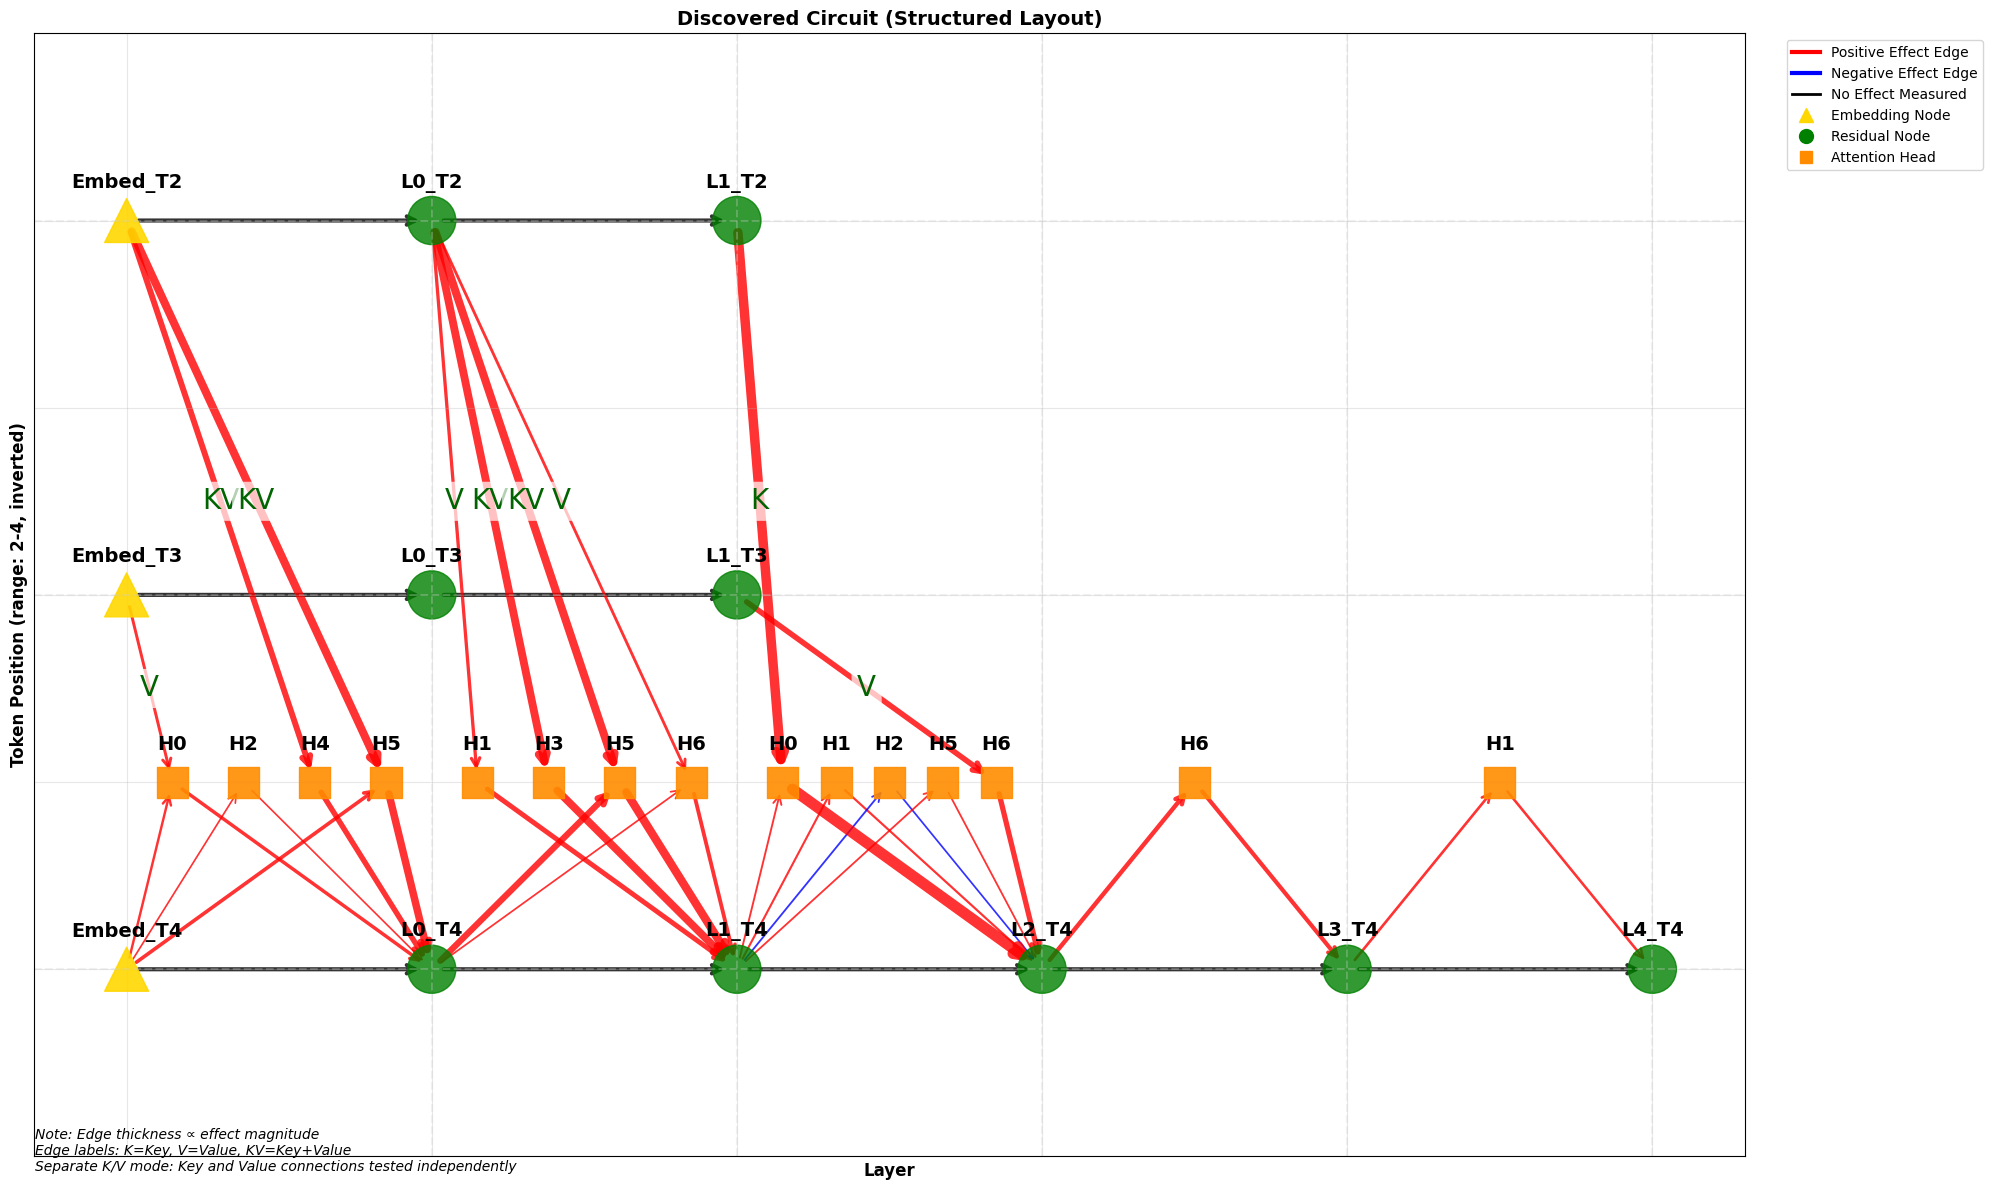


Circuit Summary:
Nodes: 27
Edges: 48

Edges by effect size:
  L2H0_T4 → L2_T4 (attn_out): 0.1952
  L1_T2 → L2H0_T4 (key): 0.1552
  L1H5_T4 → L1_T4 (attn_out): 0.1284
  L0_T2 → L1H5_T4 (key): 0.1233
  Embed_T2 → L0H5_T4 (value): 0.1231
  L0_T2 → L1H3_T4 (value): 0.1187
  L1H3_T4 → L1_T4 (attn_out): 0.1147
  L0H5_T4 → L0_T4 (attn_out): 0.1108
  L0_T4 → L1H5_T4 (query): 0.0865
  Embed_T2 → L0H4_T4 (value): 0.0793
  L1_T3 → L2H6_T4 (value): 0.0724
  L0H4_T4 → L0_T4 (attn_out): 0.0700
  L2H6_T4 → L2_T4 (attn_out): 0.0670
  L1H1_T4 → L1_T4 (attn_out): 0.0611
  L0_T2 → L1H3_T4 (key): 0.0541
  L2_T4 → L3H6_T4 (query): 0.0519
  Embed_T2 → L0H5_T4 (key): 0.0507
  L3H6_T4 → L3_T4 (attn_out): 0.0481
  L0_T2 → L1H5_T4 (value): 0.0427
  L1H6_T4 → L1_T4 (attn_out): 0.0427
  Embed_T4 → L0H5_T4 (query): 0.0396
  L0H0_T4 → L0_T4 (attn_out): 0.0368
  L0_T2 → L1H1_T4 (value): 0.0342
  Embed_T2 → L0H4_T4 (key): 0.0323
  Embed_T3 → L0H0_T4 (value): 0.0295
  L0_T2 → L1H6_T4 (value): 0.0277
  L3_T4 → L4H1_T4

In [ ]:
# Build and merge circuits with individual thresholds for each corrupted text
merged_circuit, individual_circuits, metrics = simple_acdc.build_and_merge_circuits(
    model=model,
    max_layer=4,
    original_text="He kicked the bucket",
    corrupted_texts=["He kicked the ball", "He kicked which bucket", "He washed the bucket"],
    target_text="He died",
    # thresholds=[0.013, 0.015, 0.018, 0.004, 0.008, 0.01],  # Individual thresholds for each
    thresholds=[0.013, 0.011, 0.024],  # Individual thresholds for each
    min_token_pos=2,
    corrupt_q=True,
    separate_kv=True,
    quiet=True
)

# Visualize the merged circuit
# Create a SimpleACDC instance to use its visualization method
acdc_visualizer = simple_acdc.SimpleACDC(model, max_layer=4, threshold=0.01, corrupt_q=True, separate_kv=True)
acdc_visualizer.visualize_circuit(merged_circuit, 
                                #  save_path="circuits/merged_circuit.png",
                                 min_token_pos=2)

In [51]:
texts = ["He kicked the bucket", "He kicked the buckets", "He kicked the pail", "He booted the bucket", "He punched the bucket"]
dot_products = simple_acdc.compute_qk_dot_products(
    model=model,
    texts=texts,
    layer=0,
    head_idx=5,
    q_index=4,
    k_index=2  
)

Computing Q-K dot products for Layer 0, Head 5 (Q@4, K@2):
Q token at position 4: ' bucket'
K token at position 2: ' kicked'
--------------------------------------------------------------------------------
'He kicked the bucket' -> 66.396858
'He kicked the buckets' -> 51.894302
'He kicked the pail' -> 32.166965
'He booted the bucket' -> 45.797302
'He punched the bucket' -> 44.199623
--------------------------------------------------------------------------------


In [50]:
importlib.reload(gemma_utils)
importlib.reload(simple_acdc)

All required packages imported successfully!


<module 'simple_acdc' from '/Users/andrewgomes/Documents/LLMConstructions/simple_acdc.py'>